# **Introduction**

> **Partie I - Mod√©lisation Univari√©e**


1.   Impotation des donn√©es : taux d'infaltion et taux de ch√¥mage aux Etats-Unis du 1950 au 2023

2.   Repr√©sentations graphiques et autocorr√©logrammes simples et partiels des 2 s√©ries temporelles

3.   Test de racine unitaire (test ADF et KPSS)

4.   Mod√®le ARMA

5.   Les pr√©visions

> **Partie II - Mod√©lisation Multivari√©e**

6.   Mod√®le VAR

7.   Test de causalit√©

8.   Analyse impulsion - r√©ponse des chocs (M√©thode VAR et M√©thode des projections locales)

9.   Test de coint√©gration de Johansen


---
Ce projet d'√©conom√©trie vise √† explorer la relation historique entre le taux de ch√¥mage et le taux d'inflation aux √âtats-Unis, une dynamique souvent encapsul√©e dans la fameuse courbe de Phillips. Depuis sa conceptualisation par A.W. Phillips, la courbe a √©t√© un sujet de d√©bat continu, illustrant une relation inverse √† court terme entre le ch√¥mage et l'inflation. Ce ph√©nom√®ne est fondamental pour comprendre comment les pressions inflationnistes sont li√©es √† la capacit√© d'une √©conomie √† cr√©er des emplois.
Notre analyse se concentrera sur les donn√©es temporelles de 1950 √† 2023, une p√©riode qui comprend de multiples cycles √©conomiques, politiques mon√©taires et fiscales vari√©es, ainsi que des √©v√©nements exceptionnels susceptibles d'affecter la relation entre ces deux variables. Nous d√©buterons par une analyse univari√©e de chaque s√©rie temporelle, en employant des repr√©sentations graphiques et des autocorr√©logrammes pour examiner leurs caract√©ristiques statistiques et leur stationnarit√©.
Apr√®s avoir √©tabli la stationnarit√© des s√©ries, nous d√©velopperons un mod√®le ARMA pour l'une des s√©ries et fournirons des pr√©visions. Cette √©tape pr√©parera le terrain pour une mod√©lisation multivari√©e plus complexe, o√π nous estimons un mod√®le VAR pour capturer la dynamique conjointe de l'inflation et du ch√¥mage.
Par la suite, nous allons √©tudier si la relation entre le ch√¥mage et l'inflation a chang√© de mani√®re complexe et impr√©vue au fil du temps. Pour cela, nous utiliserons des m√©thodes statistiques pour voir si l'une de ces mesures √©conomiques pr√©dit l'autre et dans quelle mesure elles s'affectent mutuellement.

Cette exploration compl√®te offre une opportunit√© de comprendre profond√©ment la relation entre les deux variables les plus surveill√©es en macro√©conomie, en fournissant des pr√©visions pertinentes et en informant les d√©cisions politiques.



`*Projet r√©alis√© par KHOBZI Ismail et YANG Zehui*`

In [ ]:
# choix des packages qu'on va utiliser pour ne pas perdre du temps

install.packages('ggplot2')
install.packages('urca')
install.packages('forecast')
install.packages("FinTS")
install.packages("moments")
install.packages("vars")
install.packages('lpirfs')

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚Äòxts‚Äô, ‚ÄòTTR‚Äô, ‚Äòquadprog‚Äô, ‚Äòquantmod‚Äô, ‚Äòfracdiff‚Äô, ‚Äòlmtest‚Äô, ‚ÄòRcpp‚Äô, ‚ÄòtimeDate‚Äô, ‚Äòtseries‚Äô, ‚Äòzoo‚Äô, ‚ÄòRcppArmadillo‚Äô


Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚Äòstrucchange‚Äô, ‚Äòsandwich‚Äô


Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚ÄòmiscTools‚Äô, ‚Äòrbibutils‚Äô, ‚Äòiterators‚Äô, ‚Äòbdsmatrix‚Äô, 

# **Partie I - Mod√©lisation Univari√©e**



## **Question 1 - Importation et Visualisation des Donn√©es**

On importe les donn√©es annuelles du **taux d'inflation** et du **taux de ch√¥mage** des Etats-Unis **de 1950 √† 2023** (73 observations).

In [ ]:
# Importation des donn√©es

rm(list = ls())
options(digits = 3)

library(readxl)

df <- read_excel('Series_temporelles.xlsx')
str(df)

tibble [74 √ó 3] (S3: tbl_df/tbl/data.frame)
 $ Annees   : num [1:74] 1950 1951 1952 1953 1954 ...
 $ Chomage  : num [1:74] 5.21 3.28 3.03 2.93 5.59 ...
 $ Inflation: num [1:74] 1.3 7.9 1.9 0.8 0.7 -0.4 1.5 3.3 2.8 0.7 ...


On cr√©e un dataframe contenant uniquement les dates (colonne "Ann√©es") et la s√©rie du taux d'inflation (colonne "Inflation").

In [ ]:
# Cr√©ation dataframe pour le taux d'inflation

inflation <- df[,c("Annees","Inflation")]
colnames(inflation) <- c('Ann√©es','Inflation')

head(inflation)
tail(inflation)
anyNA(inflation)

Ann√©es Inflation
1 1950    1.3     
2 1951    7.9     
3 1952    1.9     
4 1953    0.8     
5 1954    0.7     
6 1955   -0.4

Ann√©es Inflation
1 2018   2.40     
2 2019   1.80     
3 2020   1.20     
4 2021   4.70     
5 2022   8.00     
6 2023   4.43

[1] FALSE

On cr√©e un dataframe contenant uniquement les dates (colonne "Ann√©es") et la s√©rie du taux de ch√¥mage (colonne "Ch√¥mage").

In [ ]:
# Cr√©ation dataframe pour le taux de ch√¥mage

chomage <- df[,c("Annees","Chomage")]
colnames(chomage) <- c('Ann√©es','Ch√¥mage')

head(chomage)
tail(chomage)
anyNA(chomage)

Ann√©es Ch√¥mage
1 1950   5.21   
2 1951   3.28   
3 1952   3.03   
4 1953   2.93   
5 1954   5.59   
6 1955   4.37

Ann√©es Ch√¥mage
1 2018   3.89   
2 2019   3.68   
3 2020   8.09   
4 2021   5.37   
5 2022   3.64   
6 2023   3.59

[1] FALSE

Nos 2 s√©ries ne pr√©sentent aucune valeur manquante. Aisni, on va les repr√©senter graphiquement.

## **Question 2 - Repr√©sentations Graphiques et Autocorr√©logrammes Simples et Partiels**


### **Repr√©sentation Graphiques**


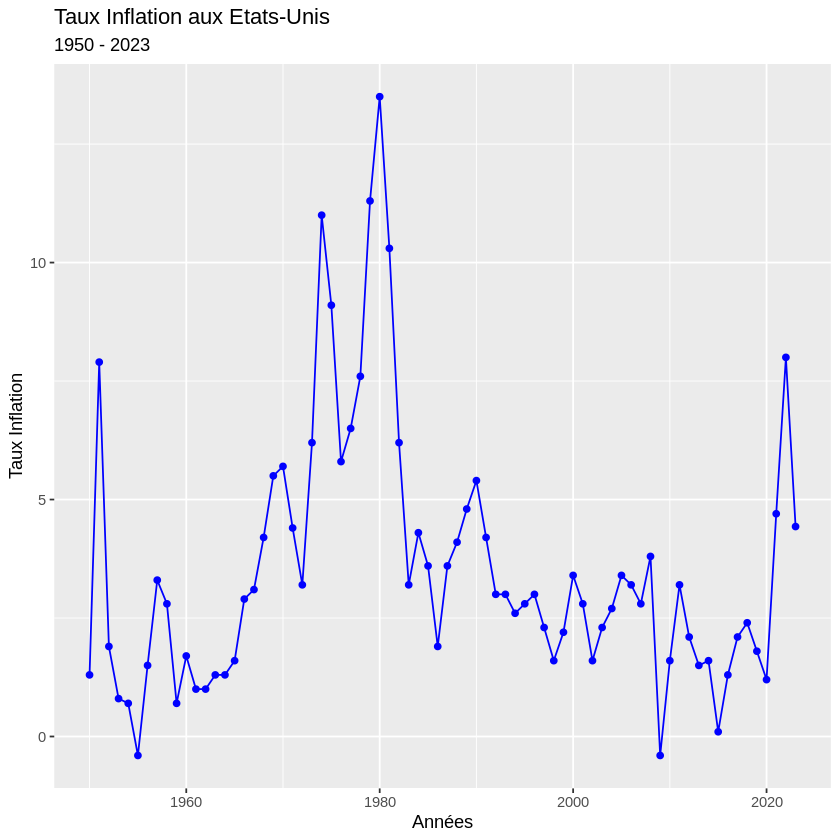

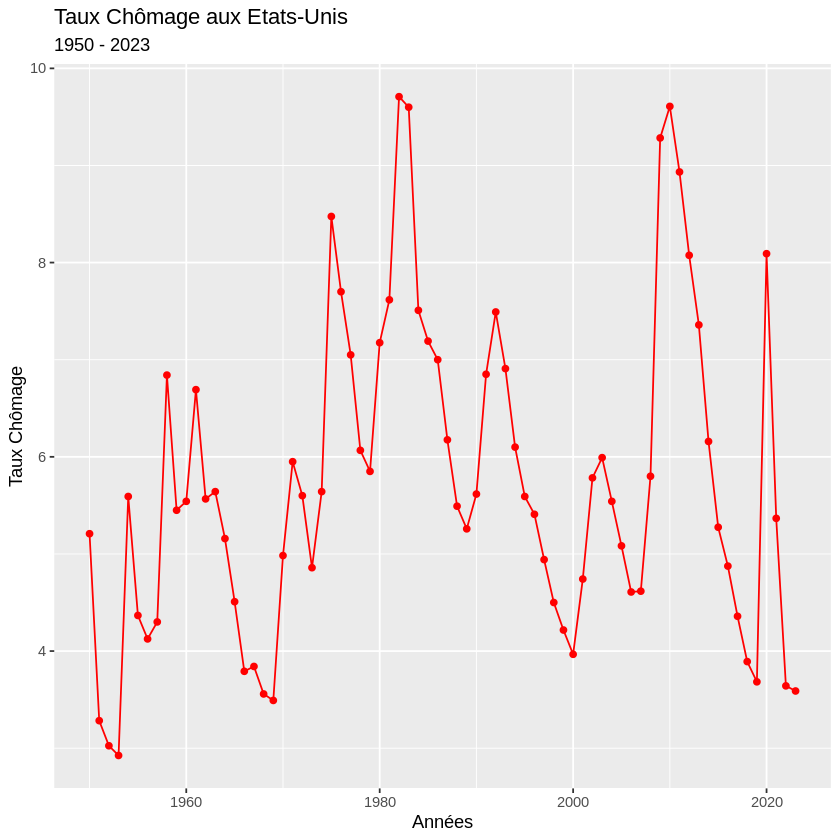

In [ ]:
# Importation de la librairie 'ggplot2'

#install.packages('ggplot2')
library(ggplot2)


# Repr√©semtation graphique du taux d'inflation

plot_inflation_us <- ggplot(data = inflation, aes(x = Ann√©es, y = Inflation)) +
  geom_point(color = 'blue') + geom_line(color = 'blue') + xlab('Ann√©es') + ylab('Taux Inflation')
plot_inflation_us +
  labs(y = "Taux Inflation", title = "Taux Inflation aux Etats-Unis", subtitle = "1950 - 2023")


# Repr√©semtation graphique du taux de ch√¥mage

plot_chomage_us <- ggplot(data = chomage, aes(x = Ann√©es, y = Ch√¥mage)) +
  geom_point(color = 'red') + geom_line(color = 'red') + xlab('Ann√©es') + ylab('Taux Ch√¥mage')
plot_chomage_us +
    labs(y = "Taux Ch√¥mage", title = "Taux Ch√¥mage aux Etats-Unis", subtitle = "1950 - 2023")


- **Graphique de l'√©volution du taux d'inflation (bleu) aux Etats-Unis de 1950 √† 2023:**

On remarque que le taux d'inflation a connu d'importantes fluctuations au cours de la p√©riode observ√©e. Cela indique des p√©riodes de volatilit√© √©conomique, ainsi que des p√©riodes de relative stabilit√©.

Plusieurs pics significatifs d'inflation, en particulier en 1974 (11%) et en 1980 (13,5%). Ces pics pourraient correspondre √† des chocs p√©troliers suite aux guerres au Moyen-Orient, √† des politiques mon√©taires expansionnistes, ou √† d'autres facteurs macro√©conomiques perturbateurs.

A la suite des pics des ann√©es 1980, le taux d'inflation semble avoir diminu√© et s'est stabilis√© √† un niveau plus bas (1,60%) jusqu'au d√©but des ann√©es 2000, ce qui peut refl√©ter les efforts de la R√©serve F√©d√©rale pour ma√Ætriser l'inflation.
En 2022, le graphique montre un pic d'inflation notable (8%). Ce pic r√©cent pourrait correspondre √† des perturbations √©conomiques caus√©es par la pand√©mie de COVID-19.

- **Graphique de l'√©volution du taux de ch√¥mage (rouge) aux Etats-Unis de 1950 √† 2023:**

Le taux de ch√¥mage fluctue de mani√®re significative sur l'ensemble de la p√©riode, indiquant des p√©riodes de r√©cession et d'expansion √©conomique.

Des pics significatifs sont visibles √† plusieurs reprises, ce qui pourrait correspondre √† des p√©riodes de crises √©conomiques ou de ralentissement, comme celles en 1975 (8,48%), en  1982 (9,71%), √† la suite de la p√©riode de la crise financi√®re de 2007-2008 (9,61% en 2010), et de la crise du COVID-19 (8% en 2020).

Bien que le taux de ch√¥mage ait connu des pics, on peut observer des p√©riodes o√π il diminue (en 2000 par exemple), ce qui pourrait √™tre le r√©sultat de la reprise √©conomique, des politiques d'emploi, ou d'autres facteurs favorisant la cr√©ation d'emplois.

- **Comparaison des deux graphiques:**

En examinant la courbe de Phillips, qui pr√©sente une relation n√©gative entre l'inflation et le ch√¥mage √† court terme, les donn√©es de nos deux graphiques peuvent ne pas toujours montrer une corr√©lation claire et inverse. Cela pourrait √™tre influenc√© par d'autres facteurs et politiques √©conomiques.

On note que pendant le d√©but des ann√©es 1970, les √âtats-Unis ont connu de la stagflation, o√π le ch√¥mage √©lev√© et l'inflation √©taient pr√©sents simultan√©ment, ce qui d√©fie l'interpr√©tation traditionnelle de la courbe de Phillips.


- **Interpr√©tation de la stationnarit√© du taux d'inflation et du taux d'inflation:**

Visuellement, en se basant sur les graphiques aucune des deux s√©ries ne semblent √™tre stationnaire. Les deux montrent des changements significatifs dans leurs niveaux moyens et leurs variances au fil du temps, ainsi que des p√©riodes de pics et de creux.


### **Autocorr√©logrammes Simples et Partiels**

#### **ACF et PACF du taux d'inflation**

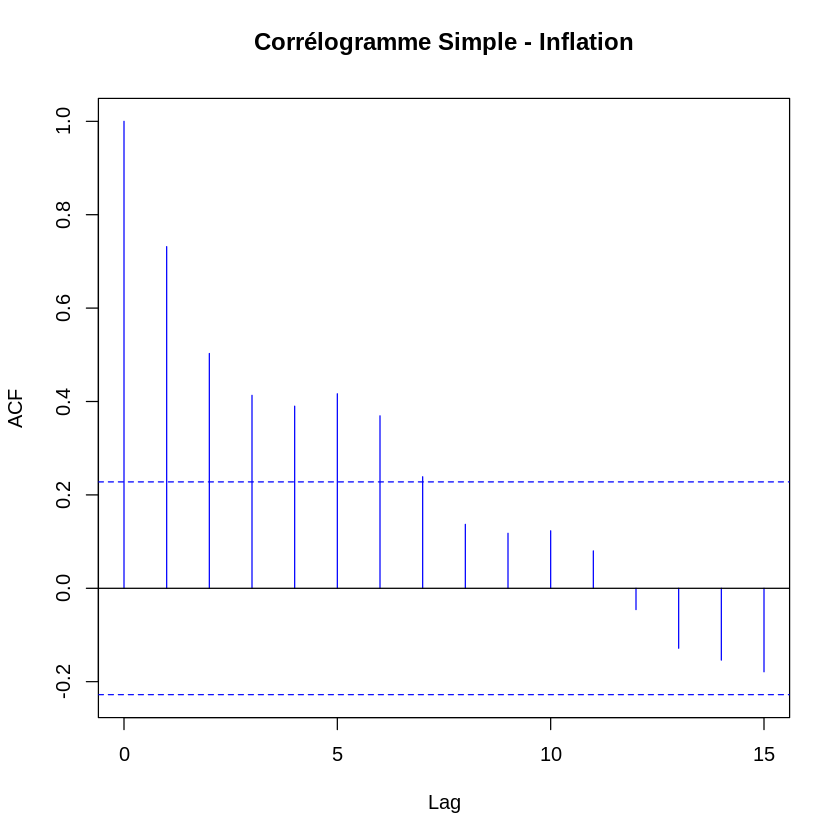

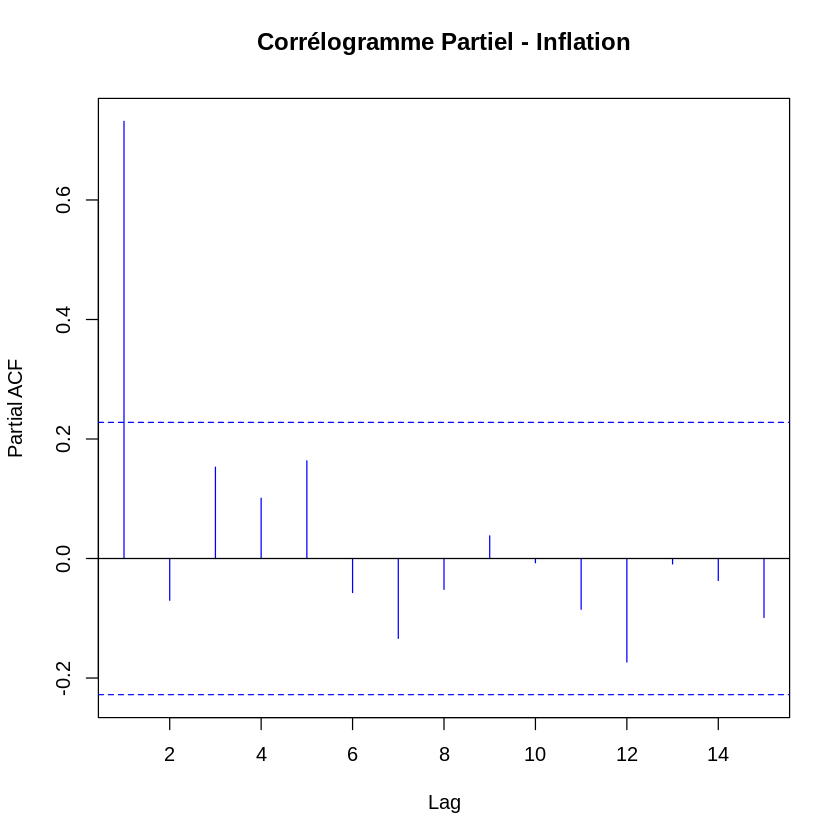

In [ ]:
acf(x = inflation$Inflation, lag.max = 15, main = 'Corr√©logramme Simple - Inflation', col = 'blue')

pacf(x = inflation$Inflation, lag.max = 15, main = 'Corr√©logramme Partiel - Inflation', col = 'blue')

On observe que le PACF du taux d'inflation n'a que son premier terme diff√©rent de 0. La d√©croissance rapide des barres apr√®s le premier ou les deux premiers lags sugg√®re que les valeurs de la s√©rie sont principalement influenc√©es par les valeurs imm√©diatement pr√©c√©dentes et que les influences des lags plus √©loign√©s sont minimales, cela caract√©rise un $AR(1)$.

L'ACF du taux d'inflation pr√©sente une  corr√©lation initiale forte et positive, ce qui est typique pour une s√©rie temporelle non-stationnaire. La d√©croissance lente des barres d'autocorr√©lation sugg√®re qu'un choc √† un certain point a un effet qui diminue lentement au fil du temps. Cela indique √©galement une d√©pendance √† long terme et est un signe que la s√©rie peut √™tre non-stationnaire.



#### **ACF et PACF du taux de ch√¥mage**

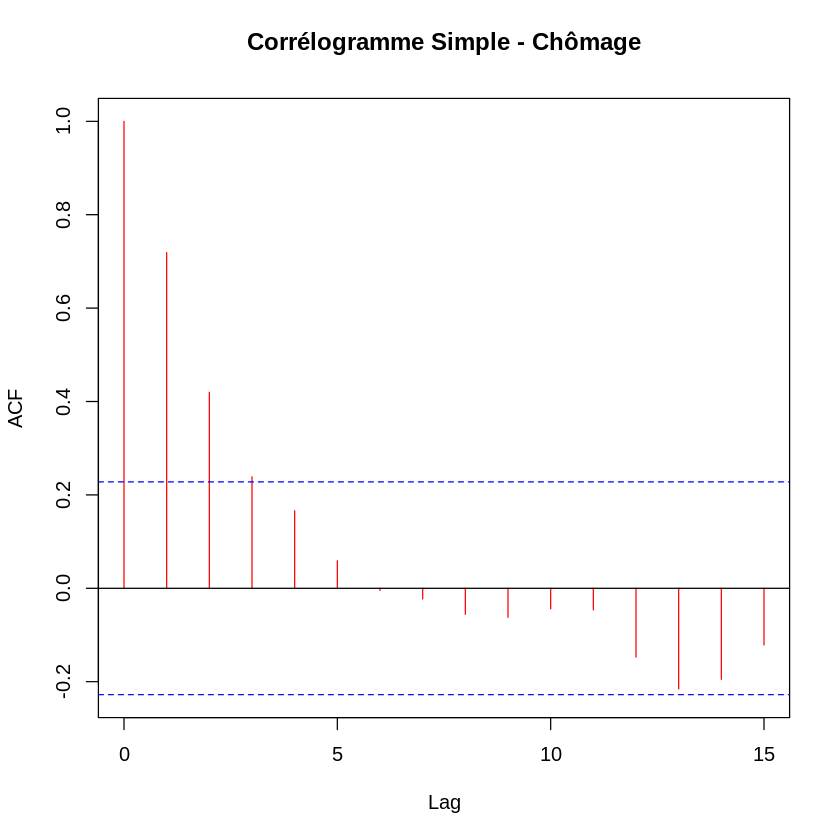

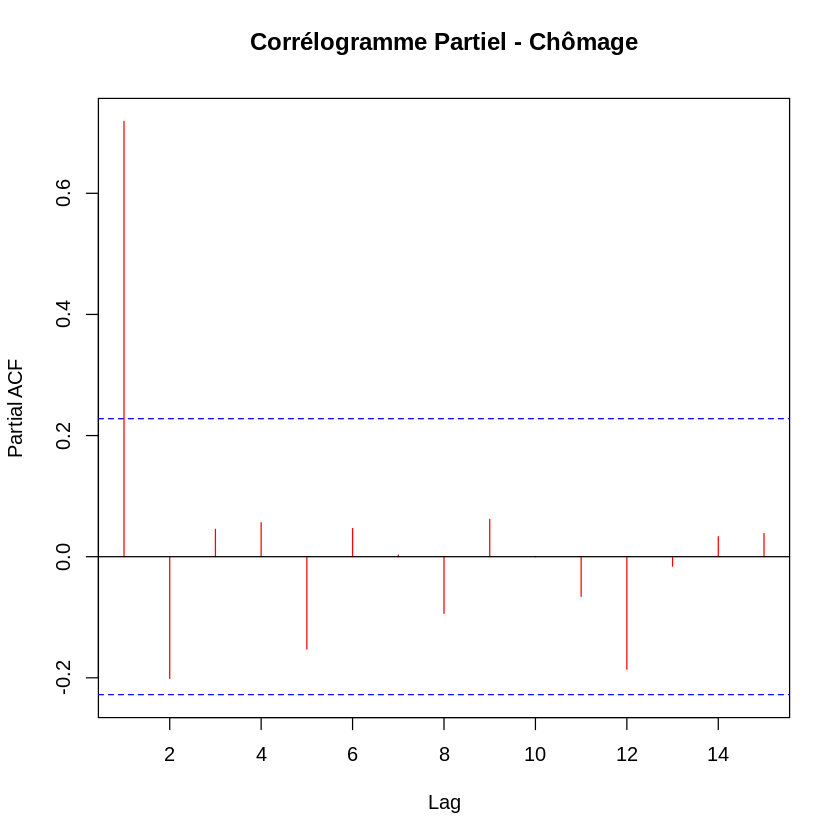

In [ ]:
acf(x = chomage$`Ch√¥mage`, lag.max = 15, main = 'Corr√©logramme Simple - Ch√¥mage', col = 'red')

pacf(x = chomage$`Ch√¥mage`, lag.max = 15, main = 'Corr√©logramme Partiel - Ch√¥mage', col = 'red')


Les autocorr√©lations sont positives et significativement jusqu'au retard 3.
Le premier retard est proche de 1 puis les autres sont d√©croissent rapidement vers 0. Ce qui indique que les observations ne sont pas fortement corr√©l√©es avec leurs valeurs pass√©es. Cela peut sugg√©rer que la s√©rie est stationnaire.  
Les autocorr√©lations partielles sont significatives pour le retard 1.
Le profil des autocorr√©lations sugg√®re d'esimer un mod√®le $AR(1)$.

- Conclusion:

Le taux de l'inflation et le taux du ch√¥mage sont tous caract√©ris√©s comme $AR(1)$, donc ils ne sont pas forc√©ment stationnaires. Nous allons, dans la prochaine partie, tester leurs stationnarit√©s en utilisant le test de racine unitaire (ADF) et le test de KPSS.


## **Question 3 - Test de Racine Unitaire et KPSS**

Etant donn√© que nous ne savons pas si les r√©sidus du mod√©le sont des bruits blancs, et afin d'√©viter que les r√©sultats du test soit fauss√©s. On r√©alise le test ADF pour blanchir les r√©sidus.

### **Inflation**

#### **Inflation - TRU**


On utilise la librairie urca pour faire les tests de racine unitaire.

In [ ]:
# Inslatallation de la librairie 'urca'

#install.packages('urca')
require('urca')
library(urca)

Loading required package: urca



**Strat√©gie s√©quentielle de TRU**

---
##### **Etape 1 : avec constante et tendance d√©terministe**

Nous allons d'abord tester le **mod√®le 3** :
$$ŒîX_t=ùúåX_{t-1}+c+bt+‚àë^{p}_{j=1}Œ¥_jŒîX_{t-j}+ùúÄ_t$$

avec les hypoth√®ses suivantes:

$$\begin{equation}
\begin{cases}
H_0:ùúå=0\ (non\ stationnaire)\\
H_1:ùúå<0\ (stationnaire)
\end{cases}
\end{equation}$$

In [ ]:
# Mod√®le 3 - Test ADF avec constante et tendance d√©terministe

adf_inflation_M3 <- ur.df(inflation$Inflation, type = 'trend' , lag = 15 , selectlags = 'AIC')
summary(adf_inflation_M3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-4.334 -0.845 -0.234  0.472  4.150 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   2.5622     0.9608    2.67   0.0101 * 
z.lag.1      -0.3062     0.1029   -2.97   0.0044 **
tt           -0.0296     0.0148   -2.01   0.0499 * 
z.diff.lag1   0.3572     0.1269    2.81   0.0068 **
z.diff.lag2  -0.3130     0.1360   -2.30   0.0253 * 
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1.57 on 53 degrees of freedom
Multiple R-squared:  0.331,	Adjusted R-squared:  0.28 
F-statistic: 6.55 on 4 and 53 DF,  p-value: 0.000233


Value of test-statistic is: -2.97 3.04 4.53 

Critical values for test statistics: 
      1pct  5pct 10

La statistique du test ADF (mod√®le 3) est :
$$t_{\hat{ùúå}}=-2,97$$

Les seuils de rejet figurent sur la ligne $tau3$. La statistique de test $t_{\hat{ùúå}}=-2,97$ est sup√©rieure aux seuils de rejets pour les risques de premi√®re esp√®ce de 1%, 5% et 10%. On ne peut pas rejeter $H_0$ du test de racine unitaire, on en d√©duit que le mod√®le 3 n'est pas stationnaire.

On va ensuite tester la tendance d√©terministe du mod√®le 3 avec les hypoth√®ses suivantes :

$$\begin{equation}
\begin{cases}
H_0:b=0\\
H_1:b‚â†0\
\end{cases}
\end{equation}$$

Le t-stat de la tendance d√©terministe $t_{\hat{b}}=-2,01$. Le seuil de rejet qui figure sur la table de distribution de la tendance est √©gal √† 3,14 pour un risque de premi√®re esp√®ce de 5% et 75 observations. On a donc
$|t_{\hat{b}}|= 2,01 < 3,14$ : on ne peut pas rejeter $H_0$, c'est-√†-dire que la tendance d√©terministe dans le mod√®le 3 n'est pas significative.

---



##### **Etape 2 : avec constante**

Vu que la tendance d√©terministe n'est pas significative dans le mod√®le 3, on va maintenant proc√©der au test sur le **mod√®le 2** :

$$ŒîX_t=ùúåX_{t-1}+c+‚àë^{p}_{j=1}Œ¥_jŒîX_{t-j}+ùúÄ_t$$

avec les hypoth√®ses suivantes:

$$\begin{equation}
\begin{cases}
H_0:ùúå=0\ (non\ stationnaire)\\
H_1:ùúå<0\ (stationnaire)
\end{cases}
\end{equation}$$

In [ ]:
# Mod√®le 2 - Test ADF avec constante

adf_inflation_M2 <- ur.df(inflation$Inflation, type = "drift", lag = 15, selectlags = 'AIC')
summary(adf_inflation_M2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-4.721 -0.821 -0.290  0.710  4.291 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.8045     0.4054    1.98   0.0523 . 
z.lag.1      -0.1931     0.0885   -2.18   0.0335 * 
z.diff.lag1   0.3021     0.1273    2.37   0.0213 * 
z.diff.lag2  -0.3712     0.1365   -2.72   0.0088 **
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1.62 on 54 degrees of freedom
Multiple R-squared:  0.28,	Adjusted R-squared:  0.24 
F-statistic:    7 on 3 and 54 DF,  p-value: 0.000463


Value of test-statistic is: -2.18 2.41 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


La statistique du test ADF (mod√®le 2) est :
$$t_{\hat{ùúå}}=-2,18$$

Les seuils de rejet figurent sur la ligne $tau2$. La statistique de test $t_{\hat{ùúå}}=-2,18$ est sup√©rieure aux seuils de rejets pour les risques de premi√®re esp√®ce de 1%, 5% et 10%. On ne peut pas rejeter $H_0$ du test de racine unitaire, on en d√©duit que le mod√®le 2 n'est pas stationnaire.

On va ensuite tester la constante du mod√®le 2 avec les hypoth√®ses suivantes :

$$\begin{equation}
\begin{cases}
H_0:c=0\\
H_1:c‚â†0
\end{cases}
\end{equation}$$

Le t-stat de la constante $t_{\hat{c}}=1,98$. Le seuil de rejet qui figure sur la table de distribution de la constante est √©gal √† 2,86 pour un risque de premi√®re esp√®ce de 5% et 75 observations. On a donc
$|t_{\hat{c}}|= 1,98 < 2,86$ : on ne peut pas rejeter $H_0$, c'est-√†-dire que la constante dans le mod√®le 2 n'est pas significative.

---


##### **Etape 3 : sans constante ni tendance d√©terministe**


Vu que la tendance d√©terministe et la constante ne sont pas significatives dans les pr√©c√©dents mod√®les, on va maintenant proc√©der au test sur le **mod√®le 1** :

$$ŒîX_t=ùúåX_{t-1}+‚àë^{p}_{j=1}Œ¥_jŒîX_{t-j}+ùúÄ_t$$

avec les hypoth√®ses suivantes:

$$\begin{equation}
\begin{cases}
H_0:ùúå=0\ (non\ stationnaire)\\
H_1:ùúå<0\ (stationnaire)
\end{cases}
\end{equation}$$

In [ ]:
# Mod√®le 1 - Test ADF sans constante ni tendance d√©terministe

adf_inflation_M1 <- ur.df(inflation$Inflation, type = "none", lag = 15, selectlags = 'AIC')
summary(adf_inflation_M1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-4.466 -0.522 -0.082  1.005  4.079 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
z.lag.1      -0.0436     0.0477   -0.91   0.3648   
z.diff.lag1   0.2483     0.1277    1.94   0.0570 . 
z.diff.lag2  -0.4587     0.1326   -3.46   0.0011 **
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1.66 on 55 degrees of freedom
Multiple R-squared:  0.228,	Adjusted R-squared:  0.186 
F-statistic: 5.41 on 3 and 55 DF,  p-value: 0.00246


Value of test-statistic is: -0.914 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


La statistique du test ADF (mod√®le 1) est :
$$t_{\hat{ùúå}}=-0,91$$

Les seuils de rejet figurent sur la ligne $tau1$. La statistique de test $t_{\hat{ùúå}}=-0,91$ est sup√©rieure aux seuils de rejets pour les risques de premi√®re esp√®ce de 1%, 5% et 10%. On ne peut pas rejeter $H_0$ du test de racine unitaire, on en d√©duit que le mod√®le 1 n'est pas stationnaire, donc la s√©rie "taux d'inflation" n'est pas stationnaire.

**Conclusion sur les r√©sultats de tests ADF** :

Les r√©sultats des tests ADF nous am√®nent √† conclure que la s√©rie temporelle du taux d'inflation des Etats-Unis est un processus DS d'ordre 1 (sans d√©rive) :

$$X_t‚àºI(1)$$


---

#### **Inflation - KPSS**

On applique le test de stationnarit√© de KPSS. On v√©rifie d'abord que la s√©rie n'est pas stationnaire autour d'une tendance, ensuite on fait de m√™me autour d'une constante.

##### **Test autour d'une tendance d√©terministe**
On teste les hypoth√®ses suivantes d'abord :

$$\begin{equation}
\begin{cases}
H_0:S√©rie\ stationnaire\ autour\ d'une\ tendance\ d√©terministe\\
H_1:S√©rie\ non\ stationnaire\ autour\ d'une\ tendance\ d√©terministe
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une tendance d√©terministe

kpss_inflation_tau <- ur.kpss(inflation$Inflation, type = "tau", lags = "short")
summary(kpss_inflation_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.225 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test $LM_{KPSS}=0,225$. Le seuil de rejet pour un risque de premi√®re esp√®ce de 5% est $VC=0,146$. On a donc $LM_{KPSS}=0,225>0,146$ : on rejette $H_0$, le taux d'inflation n'est pas stationnaire autour d'une tendance d√©terministe.

On peut √©galement rejeter $H_0$ pour les risques de premi√®re esp√®ce de 1% et 10%.

---

##### **Test autour d'une constante**

Ensuite, on teste les hypoth√®ses de la stationnarit√© autour d'une constante :

$$\begin{equation}
\begin{cases}
H_0:S√©rie\ stationnaire\ autour\ d'une\ constante\\
H_1:S√©rie\ non\ stationnaire\ autour\ d'une\ constante
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une constante

kpss_inflation_mu <- ur.kpss(inflation$Inflation, type = "mu", lags = "short")
summary(kpss_inflation_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.254 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test $LM_{KPSS}=0,254$. Le seuil de rejet pour un risque de premi√®re esp√®ce de 5% est $VC=0,463$. On a donc $LM_{KPSS}=0,254<0,463$ : on accepte $H_0$, le taux d'inflation est stationnaire autour d'une constante.

On doit √©galement accepter $H_0$ pour les risques de premi√®re esp√®ce de 1% et 10%.

**Conclusion g√©n√©rale sur les tests de racine unitaire et KPSS :**

On obtient deux r√©sultats diff√©rents √† partir des deux tests KPSS et ADF.

Le test ADF conclut que la s√©rie temporelle du taux d'inflation est un processus DS d'ordre 1 (sans d√©rive), cependant le test KPSS nous dit que la s√©rie est stationnaire autour d'une constante. Cela pourrait sugg√©rer que la non-stationnarit√© provient davantage des fluctuations autour de cette constante que d'une tendance persistante.

Afin de lever le doute, nous stationnariserons la s√©rie temporelle du taux d'inflation par la suite.

---

### **Ch√¥mage**

#### **Ch√¥mage - TRU**


On utilise la librairie urca pour faire les tests de racine unitaire.


**Strat√©gie s√©quentielle de TRU**

---
##### **Etape 1 : avec constante et tendance d√©terministe**

Nous allons d'abord tester le **mod√®le 3** :
$$ŒîX_t=ùúåX_{t-1}+c+bt+‚àë^{p}_{j=1}Œ¥_jŒîX_{t-j}+ùúÄ_t$$

avec les hypoth√®ses suivantes:

$$\begin{equation}
\begin{cases}
H_0:ùúå=0\ (non\ stationnaire)\\
H_1:ùúå<0\ (stationnaire)
\end{cases}
\end{equation}$$

In [ ]:
# Mod√®le 3 - Test ADF avec constante et tendance d√©terministe

adf_chomage_M3 <- ur.df(chomage$`Ch√¥mage`, type = 'trend' , lag = 15 , selectlags = 'AIC')
summary(adf_chomage_M3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-3.151 -0.599 -0.229  0.446  3.857 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.14447    0.68798    3.12   0.0029 **
z.lag.1     -0.32421    0.09498   -3.41   0.0012 **
tt          -0.00486    0.00868   -0.56   0.5779   
z.diff.lag   0.28354    0.13229    2.14   0.0366 * 
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1.1 on 54 degrees of freedom
Multiple R-squared:  0.195,	Adjusted R-squared:  0.15 
F-statistic: 4.36 on 3 and 54 DF,  p-value: 0.00799


Value of test-statistic is: -3.41 4.06 6.08 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6.50  4.88  4.16
phi3

La statistique du test ADF (mod√®le 3) est :
$$t_{\hat{ùúå}}=-3,41$$

Les seuils de rejet figurent sur la ligne $tau3$. La statistique de test $t_{\hat{ùúå}}=-3,41$ est sup√©rieure aux seuils de rejets pour les risques de premi√®re esp√®ce de 1% et 5%. On ne peut pas rejeter $H_0$ du test de racine unitaire aux seuils de 1% et 5%.

On va ensuite tester la tendance d√©terministe du mod√®le 3 avec les hypoth√®ses suivantes :

$$\begin{equation}
\begin{cases}
H_0:b=0\\
H_1:b‚â†0\
\end{cases}
\end{equation}$$

Le t-stat de la tendance d√©terministe $t_{\hat{b}}=-0,56$. Le seuil de rejet qui figure sur la table de distribution de la tendance est √©gal √† 3,14 pour un risque de premi√®re esp√®ce de 5% et 75 observations. On a donc
$|t_{\hat{b}}|= 0,56 < 3,14$ : on ne peut pas rejeter $H_0$, c'est-√†-dire que la tendance d√©terministe dans le mod√®le 3 n'est pas significative.

---

##### **Etape 2 : avec constante**

Vu que la tendance d√©terministe n'est pas significative dans le mod√®le 3, on va maintenant proc√©der au test sur le **mod√®le 2** :

$$ŒîX_t=ùúåX_{t-1}+c+‚àë^{p}_{j=1}Œ¥_jŒîX_{t-j}+ùúÄ_t$$

avec les hypoth√®ses suivantes:

$$\begin{equation}
\begin{cases}
H_0:ùúå=0\ (non\ stationnaire)\\
H_1:ùúå<0\ (stationnaire)
\end{cases}
\end{equation}$$

In [ ]:
# Mod√®le 2 - Test ADF avec constante

adf_chomage_M2 <- ur.df(chomage$`Ch√¥mage`, type="drift", lag = 15, selectlags = 'AIC')
summary(adf_chomage_M2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-3.304 -0.627 -0.278  0.418  3.729 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.9429     0.5825    3.34   0.0015 **
z.lag.1      -0.3266     0.0943   -3.46   0.0010 **
z.diff.lag    0.2903     0.1309    2.22   0.0308 * 
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 1.1 on 55 degrees of freedom
Multiple R-squared:  0.19,	Adjusted R-squared:  0.161 
F-statistic: 6.47 on 2 and 55 DF,  p-value: 0.00299


Value of test-statistic is: -3.46 6.01 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


La statistique du test ADF (mod√®le 2) est :
$$t_{\hat{ùúå}}=-3,46$$

Les seuils de rejet figurent sur la ligne $tau2$. La statistique de test $t_{\hat{ùúå}}=-3,46$ est sup√©rieure au seuil de rejet pour le risque de premi√®re esp√®ce de 1%. On ne peut pas rejeter $H_0$ du test de racine unitaire au seuil de 1%. Cependant on peut rejeter $H_0$ aux seuils de 5% et de 10%.

On va ensuite tester la constante du mod√®le 2 avec les hypoth√®ses suivantes :

$$\begin{equation}
\begin{cases}
H_0:c=0\\
H_1:c‚â†0
\end{cases}
\end{equation}$$

Le t-stat de la constante $t_{\hat{c}}=3,34$. Le seuil de rejet qui figure sur la table de distribution de la constante est √©gal √† 2,86 pour un risque de premi√®re esp√®ce de 5% et 75 observations. On a donc
$|t_{\hat{c}}|= 3,34>2,86$ : on peut rejeter $H_0$, c'est-√†-dire que la constante dans le mod√®le 2 est significative.



**Conclusion sur les r√©sultats de tests ADF** :

Dans le mod√®le 2 aux seuils de 5% et de 10%, la s√©rie temporelle du taux de ch√¥mage est stationnaire avec d√©rive. Alors qu'au seuil de 1%, la s√©rie temporelle du taux de ch√¥mage est un processus DS d'ordre 1 avec d√©rive.

---
$$X_t‚àºI(0)+C$$




#### **Ch√¥mage - KPSS**


On applique le test de stationnarit√© de KPSS. On v√©rifie d'abord que la s√©rie n'est pas stationnaire autour d'une tendance, ensuite on fait de m√™me autour d'une constante.

##### **Test autour d'une tendance d√©terministe**

On teste les hypoth√®ses suivantes d'abord :

$$\begin{equation}
\begin{cases}
H_0:S√©rie\ stationnaire\ autour\ d'une\ tendance\ d√©terministe\\
H_1:S√©rie\ non\ stationnaire\ autour\ d'une\ tendance\ d√©terministe
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une tendance d√©terministe

kpss_chomage_tau <- ur.kpss(chomage$`Ch√¥mage`, type = "tau", lags = "short")
summary(kpss_chomage_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.149 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test $LM_{KPSS}=0,149$. Le seuil de rejet pour un risque de premi√®re esp√®ce au seuil de 5% est $VC=0,146$. On a donc $LM_{KPSS}=0,149>0,146$ : on rejette $H_0$, le taux de ch√¥mage n'est pas stationnaire autour d'une tendance d√©terministe.

---



##### **Test autour d'une constante**

Ensuite, on teste les hypoth√®ses de la stationnarit√© autour d'une constante :

$$\begin{equation}
\begin{cases}
H_0:S√©rie\ stationnaire\ autour\ d'une\ constante\\
H_1:S√©rie\ non\ stationnaire\ autour\ d'une\ constante
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une constante

kpss_chomage_mu <- ur.kpss(chomage$`Ch√¥mage`, type = "mu", lags = "short")
summary(kpss_chomage_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.224 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test $LM_{KPSS}=0,224$. Le seuil de rejet pour un risque de premi√®re esp√®ce est $VC=0,463$. On a donc $LM_{KPSS}=0,224<0,463$ : on accepte $H_0$, le taux de ch√¥mage est stationnaire autour d'une constante.

On doit √©galement accepter $H_0$ pour les risques de premi√®re esp√®ce de 1% et 10%.

**Conclusion g√©n√©rale sur les tests de racine unitaire et KPSS :**

On obtient les m√™mes r√©sultats √† partir des deux tests KPSS et ADF.

Les tests ADF et KPSS nous permettent de conclure que la s√©rie temporelle du taux de ch√¥mage est stationnaire avec d√©rive.

---


### **Stationnarisation de l'inflation**


#### **Inflation - Diff√©renciation**

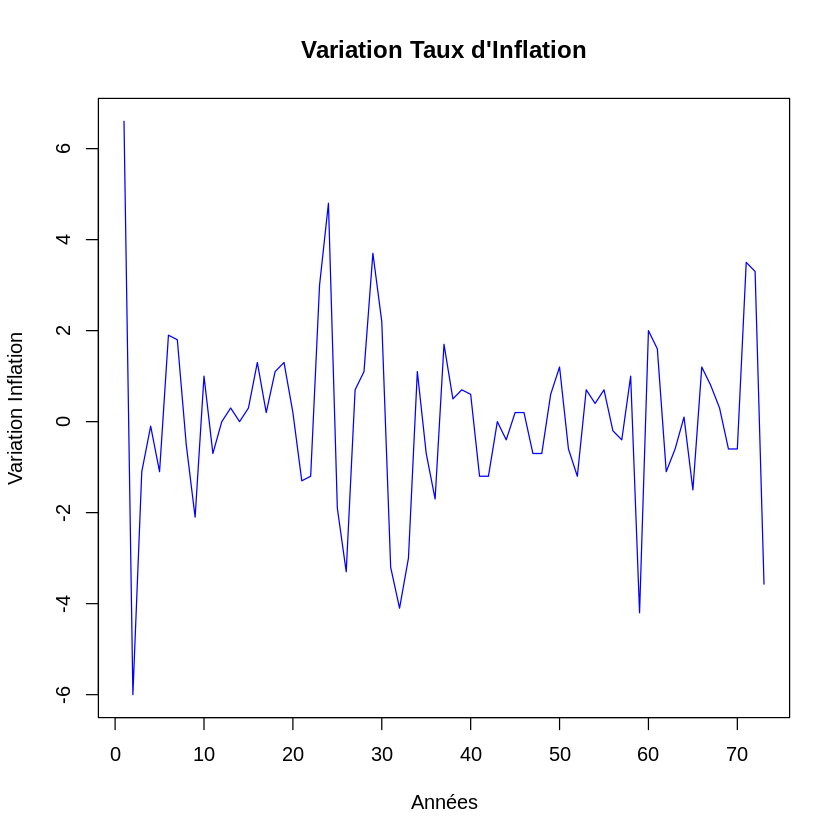

In [ ]:
# Diff√©renciation du taux d'inflation
diff_inflation <- diff(inflation$Inflation)

# Repr√©sentation graphique du taux d'inflation diff√©renci√©
plot.ts(diff_inflation, main = "Variation Taux d'Inflation", frame = T, xlab = "Ann√©es", ylab = "Variation Inflation", col = "blue")

#### **Inflation diff√©renci√©e - KPSS**

##### **Test autour d'une tendance d√©terministe**
On teste les hypoth√®ses suivantes d'abord :

$$\begin{equation}
\begin{cases}
H_0:S√©rie\ stationnaire\ autour\ d'une\ tendance\ d√©terministe\\
H_1:S√©rie\ non\ stationnaire\ autour\ d'une\ tendance\ d√©terministe
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une tendance d√©terministe

kpss_inflation_diff_tau <- ur.kpss(diff_inflation, type = "tau", lags = "short")
summary(kpss_inflation_diff_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.0487 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test $LM_{KPSS}=0,0487$. Le seuil de rejet pour un risque de premi√®re esp√®ce est $VC=0,146$. On a donc $LM_{KPSS}=0,0487<0,146$ : on ne rejette pas $H_0$, le taux d'inflation diff√©renci√© est stationnaire autour d'une tendance d√©terministe.

On ne peut rejeter $H_0$ pour les risques de premi√®re esp√®ce de 1% et 10% non plus.

---

##### **Test autour d'une constante**

Ensuite, on teste les hypoth√®ses de la stationnarit√© autour d'une constante :

$$\begin{equation}
\begin{cases}
H_0:S√©rie\ stationnaire\ autour\ d'une\ constante\\
H_1:S√©rie\ non\ stationnaire\ autour\ d'une\ constante
\end{cases}
\end{equation}$$

In [ ]:
# Test KPSS autour d'une constante

kpss_inflation_diff_mu <- ur.kpss(diff_inflation, type = "mu", lags = "short")
summary(kpss_inflation_diff_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0547 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test $LM_{KPSS}=0,0547$. Le seuil de rejet pour un risque de premi√®re esp√®ce est $VC=0,463$. On a donc $LM_{KPSS}=0,0547<0,463$ : on ne rejette pas $H_0$, le taux d'inflation diff√©renci√© est stationnaire autour d'une constante.

On ne peut rejeter $H_0$ pour les risques de premi√®re esp√®ce de 1% et 10% non plus.

---

#### **Inflation diff√©renci√©e - Corr√©logramme simple et partiel**

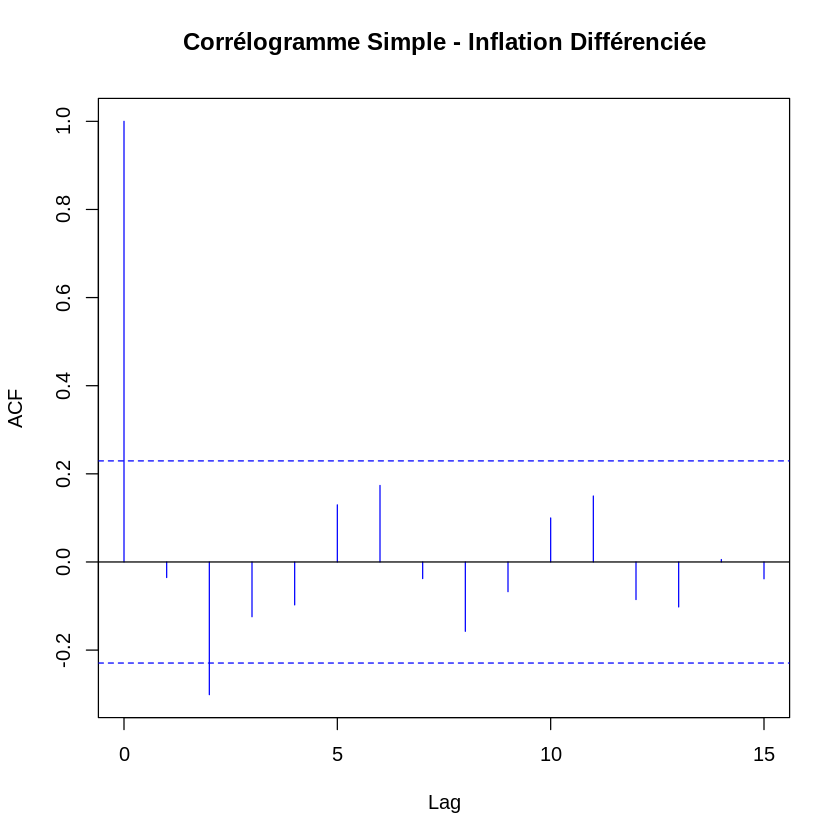

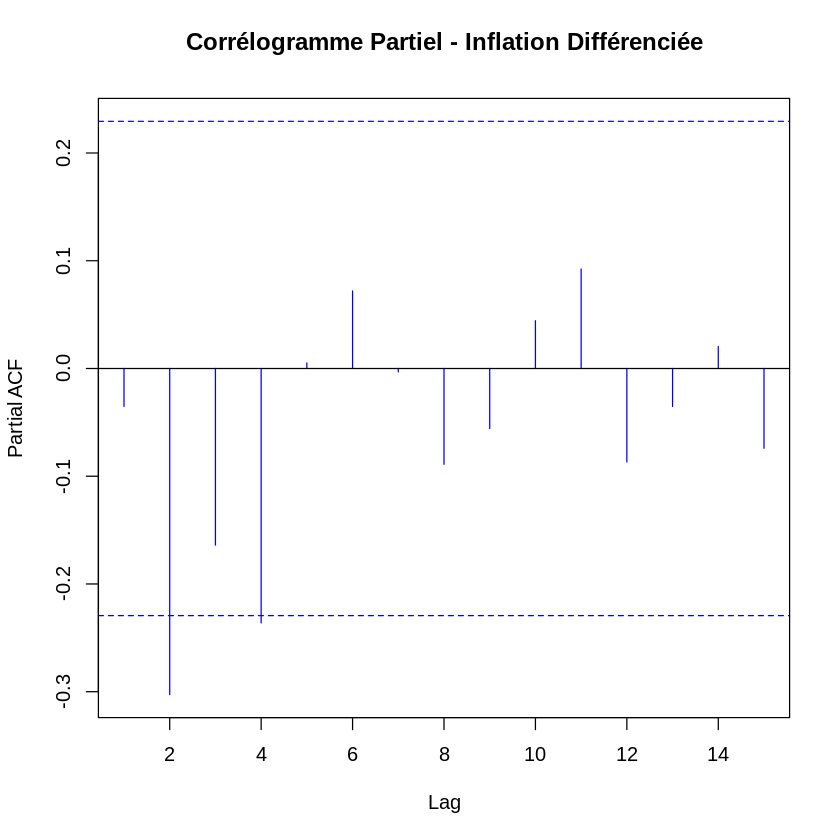

In [ ]:
acf(x = diff_inflation, lag.max = 15, main = 'Corr√©logramme Simple - Inflation Diff√©renci√©e', col = 'blue')

pacf(x = diff_inflation, lag.max = 15, main = 'Corr√©logramme Partiel - Inflation Diff√©renci√©e', col = 'blue')

L'ACF montre que les corr√©lations d√©croit assez rapidement dans la zone de non-significativit√© (entre les lignes bleues pointill√©es), ce qui est un bon signe que la diff√©renciation a  aid√© √† stabiliser la variance et √† rendre la s√©rie temporelle stationnaire. Seul l'autocorr√©lation du retard 2 est significative. Le premier retard n'est pas significatif, et proche de z√©ro. Cela sugg√©re une composante $AR$

De plus, la fonction d'autocorr√©lation partielle d√©croit elle aussi avec $h$ vers 0 sous la forme d'une sinuso√Øde amortie, et pr√©sente une coupure √† partir du 4√®me retard. Cela sugg√®re une composante $MA$. Seuls les autocorr√©lations partielles du retard 2 et 4 sont significatives. Le premier et le troisi√®me retard ont approximativement pour corr√©lations partielles -0,4 et -0,15, respectivement.

On suppose donc que le mod√®le du taux d'inflation diff√©renci√© est un $ARMA(2,3)$.

## **Question 4 - Estimation et Tests de Validation d'un Mod√®le ARMA**

Nous allons tester le mod√®le suppos√© de la s√©rie temporelle du **taux de ch√¥mage**, $AR(1)$. La s√©rie temporelle √©tant initialement stationnaire d'apr√®s les tests ADF et KPSS, nous pouvons l'utiliser pour l'estimation du mod√®le $ARMA$. Afin de v√©rifier la valeur du param√®tre $p$, nous allons utiliser les crit√®res d'informations, ainsi que les tests de significativit√© des param√®tres.



### **Identification par les crit√®res d'informations**

In [ ]:
#install.packages('forecast')
library(forecast)

mat_aic <- matrix(0,5,5)
mat_bic <- matrix(0,5,5)

for (i in 0:4){
  for (j in 0:4){
    ARMA_ij <- Arima(y = chomage$`Ch√¥mage`, order = c(i,0,j), method = "ML")
    mat_aic[i+1, j+1] <- ARMA_ij$aic
    mat_bic[i+1, j+1] <- ARMA_ij$bic
  }
}

rownames(mat_aic) <- c('p=0', 'p=1', 'p=2', 'p=3', 'p=4')
colnames(mat_aic) <- c('q=0', 'q=1', 'q=2', 'q=3', 'q=4')

rownames(mat_bic) <- c('p=0', 'p=1', 'p=2', 'p=3', 'p=4')
colnames(mat_bic) <- c('q=0', 'q=1', 'q=2', 'q=3', 'q=4')

options (digits = 5)

# Affichage matrice AIC
print(mat_aic)

#Affichage matrice BIC
print(mat_bic)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



       q=0    q=1    q=2    q=3    q=4
p=0 286.27 246.39 234.11 235.33 235.90
p=1 233.17 232.45 234.22 235.86 237.38
p=2 232.37 234.33 235.89 237.64 236.40
p=3 234.31 236.36 232.40 234.32 235.17
p=4 236.25 238.02 234.28 234.10 237.17
       q=0    q=1    q=2    q=3    q=4
p=0 290.88 253.31 243.32 246.85 249.73
p=1 240.08 241.66 245.74 249.69 253.51
p=2 241.58 245.85 249.71 253.77 254.83
p=3 245.83 250.18 248.53 252.75 255.91
p=4 250.08 254.15 252.71 254.83 260.21


On identifie un processus $AR(2)$ avec le crit√®re
$AIC$ (232,37 < 233,17). Avec le crit√®re $BIC$, on privil√©gierait un $AR(1)$ (240,08 < 241,58) mais l‚Äô$AR(2)$ est la 2√®me sp√©cification pr√©f√©r√©e. On note que la diff√©rence du crit√©re $AIC$ entre l'$AR(1)$ et l'$AR(2)$ est de 0,8. Alors que la diff√©rence du crit√©re $BIC$ entre l'$AR(1)$ et l'$AR(2)$ est de 1,5. De plus, on note que le crit√®re $AIC$ a tendance √† surestimer le mod√®le. Ainsi, pour la simplicit√© du mod√®le on a choisi le crit√®re $BIC$, donc le mod√®le estim√© sera un $AR(1)$, en coordination avec la supposition √©mise √† partir des corr√©logrammes simple et partiel du ch√¥mage.

### **Estimation du mod√®le**

On estime un processus $AR(1)$ sur le taux de ch√¥mage aux Etats-Unis de 1950 √† 2023.

In [ ]:
# Estimation du processus AR(1)

AR1 <- Arima(y = chomage$`Ch√¥mage`, order = c(1,0,0))
summary(AR1)

Series: chomage$Ch√¥mage 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
        ar1   mean
      0.727  5.637
s.e.  0.079  0.461

sigma^2 = 1.28:  log likelihood = -113.58
AIC=233.17   AICc=233.51   BIC=240.08

Training set error measures:
                    ME   RMSE     MAE     MPE  MAPE   MASE    ACF1
Training set 0.0060317 1.1173 0.82168 -3.7108 14.91 0.9625 0.14765

Comme c'est l'esp√©rance du mod√®le qui est report√© et non la constante, on en d√©duit que la constante estim√©e vaut :

$$\hat{c}= 5,637√ó(1-0,727)= 1,538901$$



#### **Test de significativit√© des coefficients**

Avec la librairie lmtest.

1. On v√©rifie la significativit√© de la constante :

$$\begin{equation}
\begin{cases}
H_0:c=0\\
H_1:c‚â†0
\end{cases}
\end{equation}$$


2. On v√©rifie la significativit√© celle des coefficients de l'$AR(2)$ :

$$\begin{equation}
\begin{cases}
H_0:ùúô_i=0\\
H_1:ùúô_i‚â†0
\end{cases}
\end{equation}$$

La statistique du test est:

$$t_{\hat{ùúô}_i}=\frac{\hat{ùúô}_i-0}{\hat{ùúé}_{\hat{ùúô}_i}}\underset{H_0}{\sim}St(T-K)=St(75-2)=St(73)$$



In [ ]:
library(lmtest)

# Test sur les param√®tres
coeftest(AR1)

Loading required package: zoo


Attaching package: ‚Äòzoo‚Äô


The following objects are masked from ‚Äòpackage:base‚Äô:

    as.Date, as.Date.numeric





z test of coefficients:

          Estimate Std. Error z value Pr(>|z|)    
ar1         0.7272     0.0789    9.22   <2e-16 ***
intercept   5.6372     0.4610   12.23   <2e-16 ***
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1


On remarque que la constante est significatif pour un risque de premi√®re esp√®ce de 5% : $$|t_{\hat{c}_i}|=12,23>1,96$$
De m√™me, le coefficient $ùúô$ est significatif au seuil de 5%: $$|t_{\hat{ùúô}}|=9,22>1,96$$

####**Estimation de sp√©cifications alternatives**


On rajoute un terme $AR(2)$ puis un terme $MA(1)$ pour v√©rifier leurs significativit√©.

In [ ]:
# Ajout d'un terme AR

AR2 <- Arima(y = chomage$`Ch√¥mage`, order = c(2,0,0))
summary(AR2)
coeftest(AR2)

Series: chomage$Ch√¥mage 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
        ar1     ar2   mean
      0.869  -0.198  5.691
s.e.  0.114   0.117  0.381

sigma^2 = 1.25:  log likelihood = -112.18
AIC=232.37   AICc=232.95   BIC=241.58

Training set error measures:
                      ME   RMSE     MAE    MPE  MAPE    MASE     ACF1
Training set -0.00031555 1.0958 0.80385 -3.691 14.58 0.94162 0.013194


z test of coefficients:

          Estimate Std. Error z value Pr(>|z|)    
ar1          0.869      0.114    7.61  2.7e-14 ***
ar2         -0.198      0.117   -1.69    0.091 .  
intercept    5.691      0.381   14.92  < 2e-16 ***
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1


Le terme $AR(2)$ n‚Äôest pas significatif au seuil de 5%. La p-value est de 0,091 qui est sup√©rieure √† 0,05.

In [ ]:
# Ajout d'un terme MA

ARMA11 <- Arima(y = chomage$`Ch√¥mage`, order = c(1,0,1))
summary(ARMA11)
coeftest(ARMA11)

Series: chomage$Ch√¥mage 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
        ar1    ma1   mean
      0.613  0.251  5.677
s.e.  0.119  0.141  0.403

sigma^2 = 1.25:  log likelihood = -112.22
AIC=232.45   AICc=233.03   BIC=241.66

Training set error measures:
                    ME   RMSE     MAE     MPE   MAPE    MASE     ACF1
Training set 0.0015659 1.0964 0.80613 -3.6559 14.622 0.94428 0.016143


z test of coefficients:

          Estimate Std. Error z value Pr(>|z|)    
ar1          0.613      0.119    5.16  2.4e-07 ***
ma1          0.251      0.141    1.78    0.075 .  
intercept    5.677      0.403   14.09  < 2e-16 ***
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1


On remarque que le terme $MA(1)$ n'est pas significatif au seuil de 5%, de plus le crit√®re $BIC$ de ce mod√®le est plus √©lev√© que celui du mod√®le de l'$AR(1)$.

On d√©cide de garder le mod√®le de l'$AR(1)$ par la suite, puisque ni l'ajout d'un $AR$ ni d'un $MA$ n'est significatif. Ainsi, On en d√©duit que le mod√®le est de la forme :

$$X_t= 1,538901 + 0,727X_{t-1}  + ùúÄ_t$$

#### **Analyse des racines**

On v√©rifie que les racines du polyn√¥me $ùõ∑(L)$ satisfont bien les conditions de stationnarit√©.

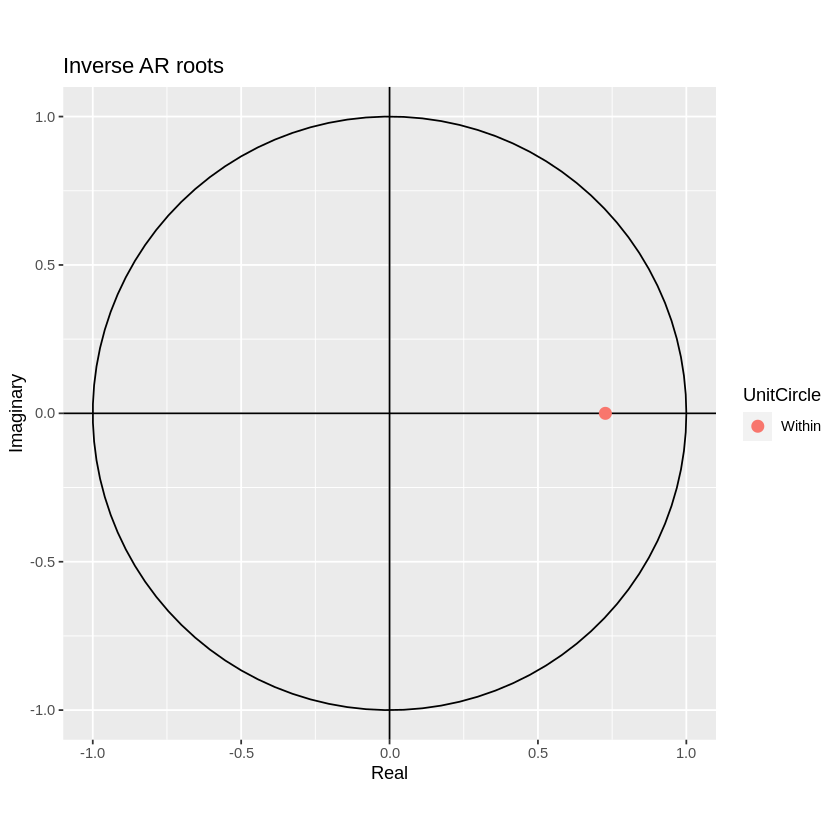

In [ ]:
autoplot(AR1)


On remarque que la racine du polyn√¥me se situe bien √† l'int√©rieur du disque unit√© complexe. Donc le processus estim√© est bien stationnaire.

###**Test sur les r√©sidus**


Les tests de v√©rification des r√©sidus sont :

1. Le test d'absence d'autocorr√©lation de Ljung-Box
2. Le test de normalit√© de Jarque et Bera
3. Le test d'absence d'effet GARCH de Engle et Granger



####**Tests d'absence d'autocorr√©lation des r√©sidus (Test Ljung-Box)**
On teste l'absence d'autocorr√©lation des r√©sidus jusqu'√† l'ordre 10. Les hypoth√®ses du test sont :

$$\begin{equation}
\begin{cases}
H_0:ùúå(1)=ùúå(2)=...=ùúå(10)=0\ (absence\ d'autocorr√©lation)\\
H_1:‚àÉi‚àà\{1,...,10\}\ tel\ que\  ùúå(i)‚â†0
\end{cases}
\end{equation}$$




	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 3.92, df = 9, p-value = 0.92

Model df: 1.   Total lags used: 10



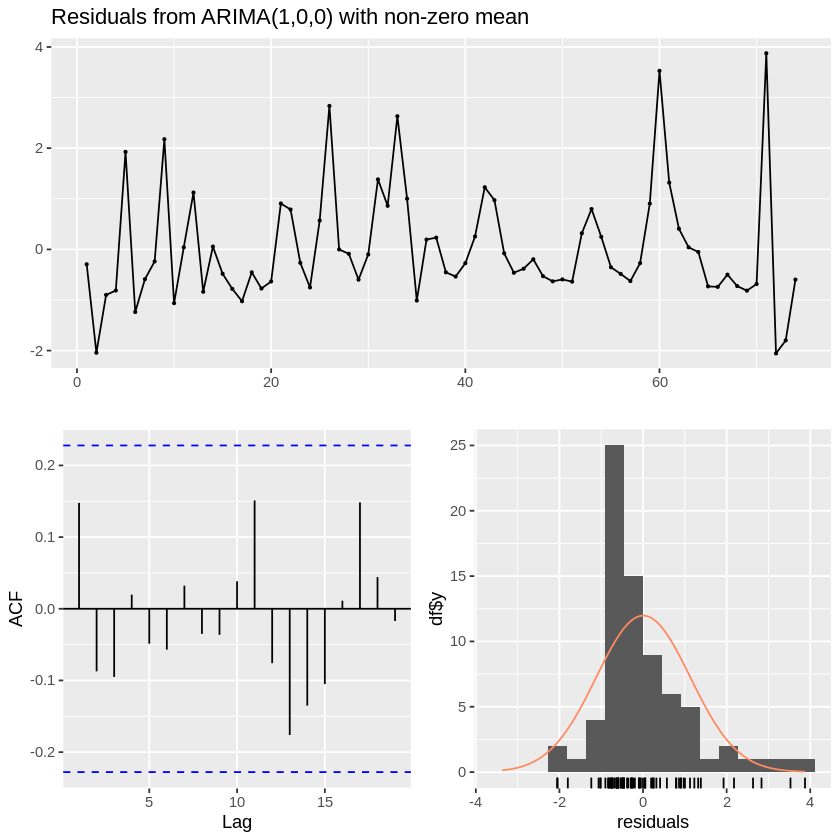

In [ ]:
# Test Ljung-Box
test_resAR1 <- checkresiduals(AR1, lag = 10)

**Commentaires**

1.   L'autocorr√©logramme montre que toutes les autocorr√©lations sont situ√©es dans les bornes de l'intervalle de confiance √† 95% : aucune des autocorr√©lations n'est significativement diff√©rente de 0.

2.   La statistique de test de Ljung-Box est √©gale √† $Q^*(10)=3,92$

*   $LB(H)\underset{H_0}{\sim}œá^2_{H-k}=œá^2_{10-1}=œá^2_{9}$
*   Les seuils critiques sont donc tir√©s de la loi $œá^2_{9}$ :
  * $Q^*_{0.90}(10)=14,68$ pour un risque de premi√®re esp√®ce de 10%
  * $Q^*_{0.95}(10)=16,92$ pour un risque de premi√®re esp√®ce de 5%
  * $Q^*_{0.99}(10)=21,666$ pour un risque de premi√®re esp√®ce de 1%
*   $Q^*(10)=1,36$ est inf√©rieure √† ces seuils critiques. On ne rejette pas l'hypoth√®se nulle d'absence d'autocorr√©lation des r√©sidus pour un risque de premi√®re esp√®ce de 1%, 5%, et 10%.
*   La probabilit√© critique est √©gale √† 0,92. Elle est sup√©rieure aux risques de premi√®re esp√®ce habituel (1%, 5% et 10%). On ne rejette pas l'hypoth√®se nulle d'absence d'autocorr√©lation des r√©sidus.




####**Test d‚Äôabsence d‚Äôeffets ARCH de Engle Granger**

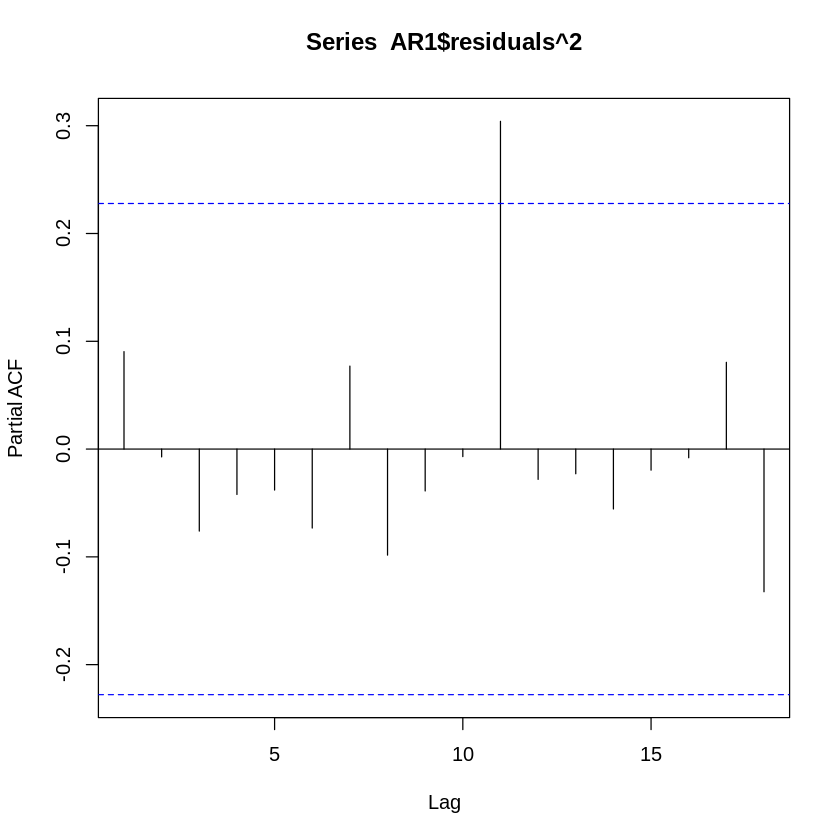

In [ ]:
pacf(AR1$residuals^2)

On remarque la pr√©sence d'un seul pic significatif. On teste l'hypoth√®se d'absence d'effet ARCH avec un retard. La r√©gression estim√©e est :

$$\hat{ùúÄ}^2_t=ùõæ_0+ùõæ_1\hat{ùúÄ}^2_{t-1}+v_t$$

Les hypoth√®ses du test sont :

$$\begin{equation}
\begin{cases}
H_0:ùõæ_1=0\ (pas\ d'effet\ ARCH)\\
H_1:ùõæ_1‚â†0\ (effet\ ARCH)
\end{cases}
\end{equation}$$

La statistique de test  est:
$$LM=T'R^2\underset{H_0}{\sim}ùúí^2_p$$

Les r√©sultats du test d'absence d'effet ARCH figurent ci-dessous :




In [ ]:
#install.packages("FinTS")
library(FinTS)

# Test ARCH
ArchTest(AR1$residuals, lags = 1)


Attaching package: ‚ÄòFinTS‚Äô


The following object is masked from ‚Äòpackage:forecast‚Äô:

    Acf





	ARCH LM-test; Null hypothesis: no ARCH effects

data:  AR1$residuals
Chi-squared = 0.599, df = 1, p-value = 0.44


*   La statistique de test est $LM_{ARCH}=0,599$
*   $LB_{stat}\underset{H_0}{\sim}œá^2_p=œá^2_1$. Les seuils critiques sont :
  * $œá^2_{1;0,90}=2,71$ pour un risque de premi√®re esp√®ce de 10%
  * $œá^2_{1;0,95}=3,84$ pour un risque de premi√®re esp√®ce de 5%
  * $œá^2_{1;0,99}=6,64$ pour un risque de premi√®re esp√®ce de 1%
*   $LM_{ARCH}=0,599$ est inf√©rieure aux seuils critiques : on ne rejette pas l'hypoth√®se nulle d'absence d'effet ARCH pour les r√©sidus pour les risques de premi√®re esp√®ce habituel (1%, 5% et 10%).
*   La p-value est √©gale √† 44% > 5%, donc pas d'effet ARCH d'ordre 1 sur les r√©sidus.



####**Test de normalit√© des r√©sidus de Jarque Bera**

##### **Histogrammes**

On repr√©sente :
1.  l'histogramme des r√©sidus (rectangles gris )
2.  l'histogramme d'une loi normale avec la m√™me moyenne et le m√™me √©cart-type que celui des r√©sidus (trait rouge)



In [ ]:
# Valeur maximale des r√©sidus
which(AR1$residuals == max(AR1$residuals))

# Valeur minimale des r√©sidus
which(AR1$residuals == min(AR1$residuals))

[1] 71

[1] 72

A l'indice 71, les r√©sidus atteignent leur valeur maximale, et √† l'indice 72 les r√©sidus atteignent leur valeur minimale. On enl√®vera ces observations par la suite afin de ne pas influencer sur les r√©sultats.

[1] "Skewness des residus : 1.253915"

[1] "kurtosis des residus : 4.921198"

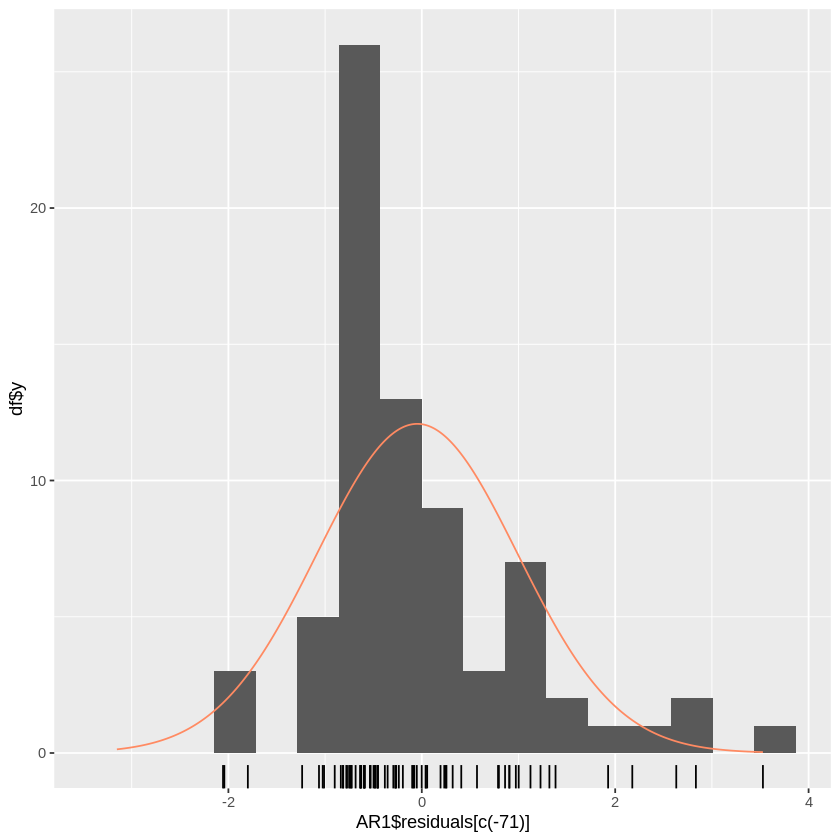

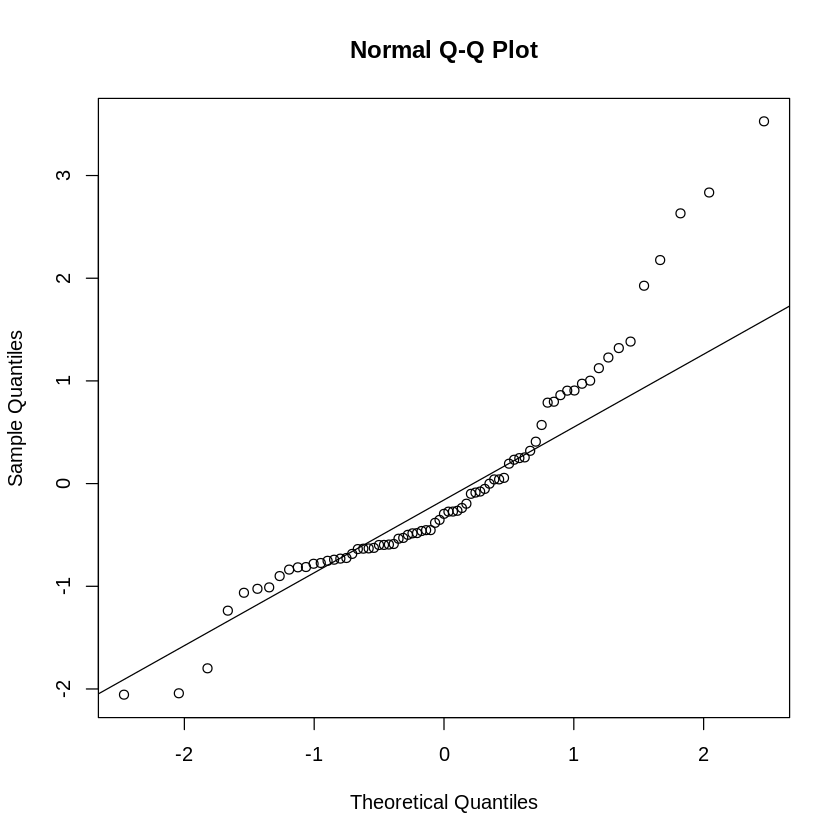

In [ ]:
#install.packages("moments")
library(moments)

# Skewness et kurtosis des r√©sidus
sprintf("Skewness des residus : %f", skewness(AR1$residuals[c(-71,-72)]))
sprintf("kurtosis des residus : %f", kurtosis(AR1$residuals[c(-71,-72)]))

# 1er graphique (avec la 71√®me obs enlev√©e)
gghistogram(AR1$residuals[c(-71)], add.normal = TRUE)

# 2√®me graphique (avec la 71√®me obs enlev√©e)
qqnorm(AR1$residuals[c(-71)])
qqline(AR1$residuals[c(-71)])

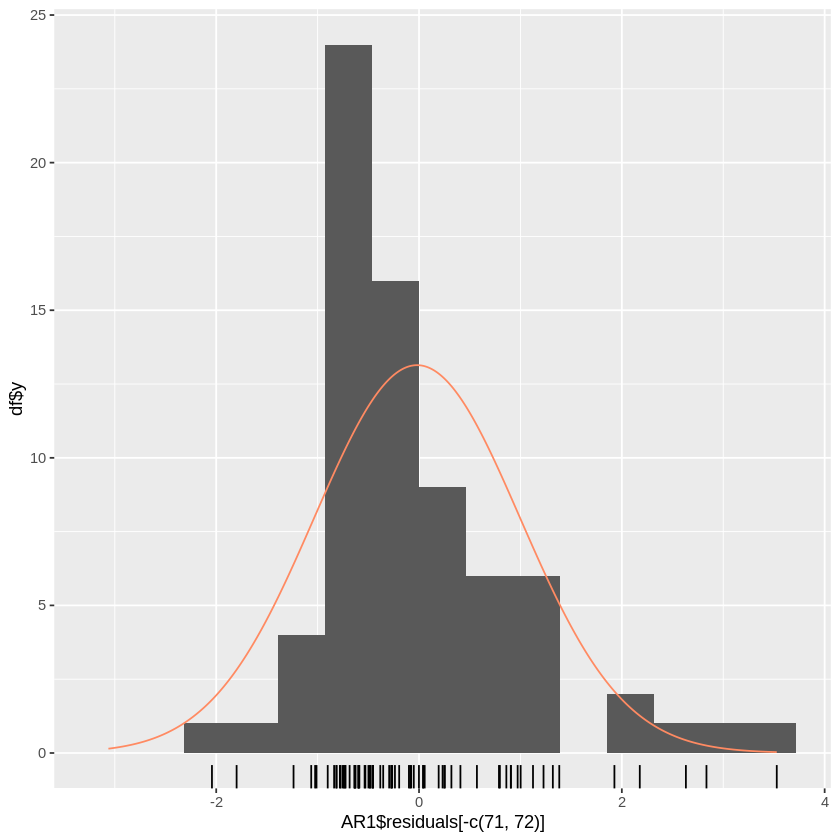

In [ ]:
# avec les 71√®me et 72√®me obs enlev√©es
gghistogram(AR1$residuals[-c(71,72)], add.normal = TRUE)

Le Skewness de 1,25 et le kurtosis de 4,92, sans la valeur maximale et minimale des r√©sidus sugg√®rent que ces derniers ont une queue de distribution plus longue du c√¥t√© droit (queue droite √©tendue), et plus lourdes que la distribution normale.

On peut voir qu'il existe des diff√©rences entre les deux histogrammes, de plus les quantiles des r√©sidus ne suivent pas une distribution normale. Ce qui permet de supposer que les r√©sidus ne suivent pas une loi normale.

##### **Test de normalit√© de Jarque Bera**

Les hypoth√®ses du test sont :

$$\begin{equation}
\begin{cases}
H_0:S(X)=0\ et\ K(X)=3\\
H_1:S(X)‚â†0\ ou\ K(X)‚â†3
\end{cases}
\end{equation}$$

La statistique du test: $$JB=\frac{T-k}{6}\bigg[\hat{S}^2+\frac{1}{4}(\hat{K}-3)^2\bigg]\underset{H_0}{\sim}\chi^2_2$$

In [ ]:
library(tseries)

# Test de Jarque Bera
jarque.bera.test(AR1$residuals)

# Test de Jarque Bera sans les observations maximale et minimale
jarque.bera.test(AR1$residuals[-c(71,72)])


	Jarque Bera Test

data:  AR1$residuals
X-squared = 36.2, df = 2, p-value = 1.4e-08



	Jarque Bera Test

data:  AR1$residuals[-c(71, 72)]
X-squared = 29.9, df = 2, p-value = 3.2e-07


*   La statistique de test de Jarque Bera est $JB_{stat}=36,2$
*   $LB_{stat}\underset{H_0}{\sim}œá^2_2$. Les seuils critiques sont :
  * $œá^2_{2;0,90}=4,61$ pour un risque de premi√®re esp√®ce de 10%
  * $œá^2_{2;0,95}=5,99$ pour un risque de premi√®re esp√®ce de 5%
  * $œá^2_{2;0,99}=9,21$ pour un risque de premi√®re esp√®ce de 1%
*   $JB_{stat}=36,2$ est sup√©rieure aux seuils critiques de premi√®re esp√®ce de 1%, 5% et 10% : on rejette l'hypoth√®se nulle, les r√©sidus ne suivent pas une loi normale.
*   La p-value est √©gale √† 1,4e-08 < 0,05, donc les r√©sidus ne suivent pas une distribution normale.
*   Le rejet de l'hypoth√®se de normalit√© peut s'expliquer par les pics du taux de ch√¥mage observ√©s en 2020 (p√©riode Covid), 1982 par exemple. La valeur du taux de ch√¥mage est alors beaucoup plus √©lev√©e que lors de p√©riode pr√©c√©dente. Ceci peut expliquer le kurtosis sup√©rieur √† 3.

##### **Correction de la non normalit√© des r√©sidus**

Afin de corriger la normalit√©, nous allons cr√©er 7 variables indicatrices, correspondant aux pics observ√©s sur le graphique du taux de ch√¥mage.

In [ ]:
# Cr√©ation d'un dataframe pour les ann√©es
annees <- df[,c("Annees")]
colnames(annees) <- c('Ann√©es')

# Cr√©ation d'une dummy variable pour l'ann√©e 2008
Date <- as.Date(annees$`Ann√©es`)

DUM09 <- as.numeric(format(annees$`Ann√©es`) == "2009")
DUM10 <- as.numeric(format(annees$`Ann√©es`) == "2010")
DUM83 <- as.numeric(format(annees$`Ann√©es`) == "1982")
DUM82 <- as.numeric(format(annees$`Ann√©es`) == "1983")
DUM20 <- as.numeric(format(annees$`Ann√©es`) == "2020")
DUM75 <- as.numeric(format(annees$`Ann√©es`) == "1975")
DUM92 <- as.numeric(format(annees$`Ann√©es`) == "1951")
variables_indicatrices <- cbind(DUM82, DUM83, DUM10,DUM09, DUM20,DUM75,DUM92)

# Correction de la non normalit√© des r√©sidus
AR1_DUM <- Arima(y = chomage$`Ch√¥mage`, order = c(1,0,0), xreg = variables_indicatrices)
summary(AR1_DUM)
coeftest(AR1_DUM)

Series: chomage$Ch√¥mage 
Regression with ARIMA(1,0,0) errors 

Coefficients:
        ar1  intercept  DUM82  DUM83  DUM10  DUM09  DUM20  DUM75   DUM92
      0.794      5.439  2.163  2.236  1.827  2.528  3.543  1.836  -0.868
s.e.  0.071      0.440  0.736  0.736  0.736  0.735  0.639  0.640   0.640

sigma^2 = 0.758:  log likelihood = -90.43
AIC=200.87   AICc=204.36   BIC=223.91

Training set error measures:
                    ME    RMSE     MAE     MPE   MAPE    MASE   ACF1
Training set 0.0036955 0.81581 0.66505 -2.6961 12.524 0.77903 0.2069


z test of coefficients:

          Estimate Std. Error z value Pr(>|z|)    
ar1         0.7936     0.0709   11.19  < 2e-16 ***
intercept   5.4390     0.4398   12.37  < 2e-16 ***
DUM82       2.1634     0.7361    2.94  0.00329 ** 
DUM83       2.2363     0.7361    3.04  0.00238 ** 
DUM10       1.8268     0.7361    2.48  0.01307 *  
DUM09       2.5279     0.7347    3.44  0.00058 ***
DUM20       3.5427     0.6394    5.54    3e-08 ***
DUM75       1.8364     0.6396    2.87  0.00409 ** 
DUM92      -0.8678     0.6397   -1.36  0.17490    
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1


On note que les coefficients $AR(1)$ et $c$ sont toujours significatifs √† 5%. De plus, les crit√®res $AIC$ et $BIC$ sont plus petits que pour la r√©gression sans indicatrice.

In [ ]:
library(tseries)

# Test de Jarque Bera
jarque.bera.test(AR1_DUM$residuals)

# Skewness et kurtosis des r√©sidus
#sprintf("Skewness des residus : %f", skewness(AR1_DUM$residuals[c(-71,-72)]))
#sprintf("kurtosis des residus : %f", kurtosis(AR1_DUM$residuals[c(-71,-72)]))



	Jarque Bera Test

data:  AR1_DUM$residuals
X-squared = 5.42, df = 2, p-value = 0.067


La p-value est √©gale √† 6,7% > 5%, donc les r√©sidus sont normalement distribu√©s.


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,0) errors
Q* = 9.39, df = 9, p-value = 0.4

Model df: 1.   Total lags used: 10



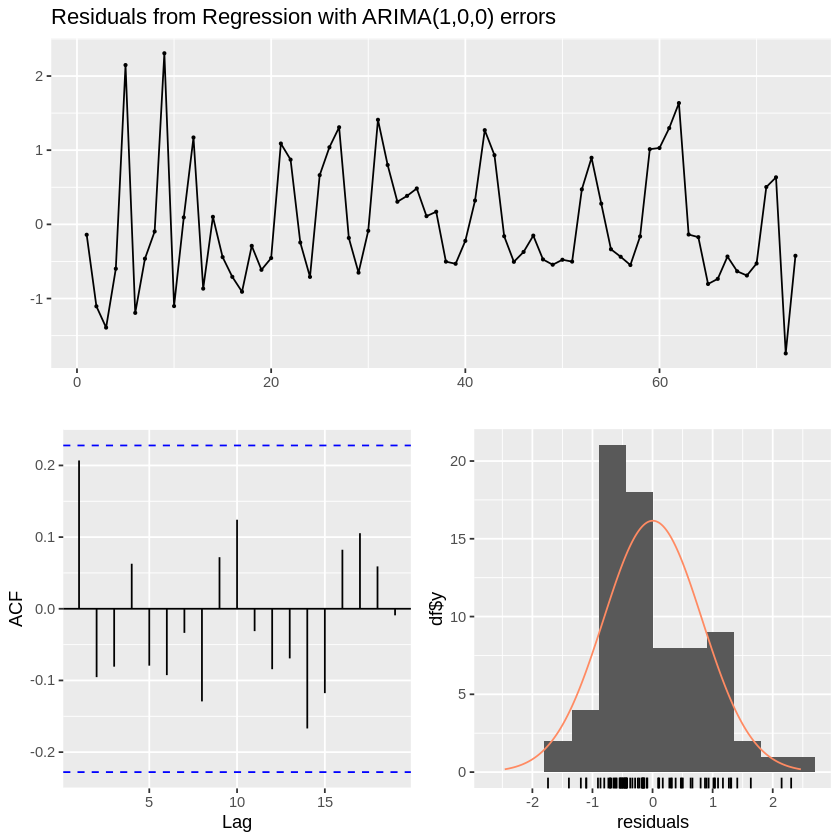


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  AR1_DUM$residuals
Chi-squared = 0.762, df = 2, p-value = 0.68


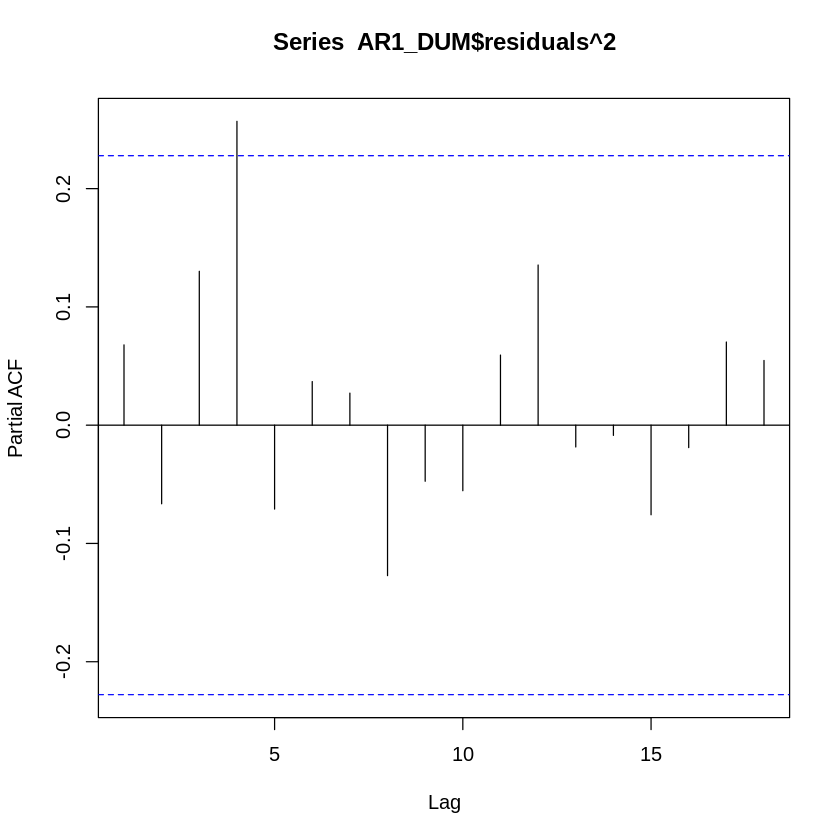

In [ ]:
library(FinTS)

# Test de Ljung-Box sur les r√©sidus du mod√®le AR1_DUM
test_resAR1_DUM <- checkresiduals(AR1_DUM, lag = 10)

# Test d'absence d'effets ARCH sur les r√©sidus du mod√®le AR1_DUM
pacf(AR1_DUM$residuals^2)

# Test ARCH sur les r√©sidus du mod√®le AR1_DUM
ArchTest(AR1_DUM$residuals, lags = 2)

*   D'apr√®s le test de Ljung-Box, les r√©sidus du mod√®le AR1_DUM ne pr√©sentent pas de corr√©lations puisque la p-value est √©gale √† 40%.
*   D'apr√®s le test d'effets ARCH, les r√©sidus du mod√®le AR1_DUM ne pr√©sentent pas d'effet ARCH, la p-value = 68%.



## **Question 5 - Les Pr√©visions**

###**Pr√©vision avec le mod√®le sans indicatrice**

####**Calclul des pr√©visions et repr√©sentation graphique**

   Point Forecast  Lo 95  Hi 95
75         4.1476 1.9276 6.3677
76         4.5540 1.8090 7.2989
77         4.8495 1.8640 7.8349

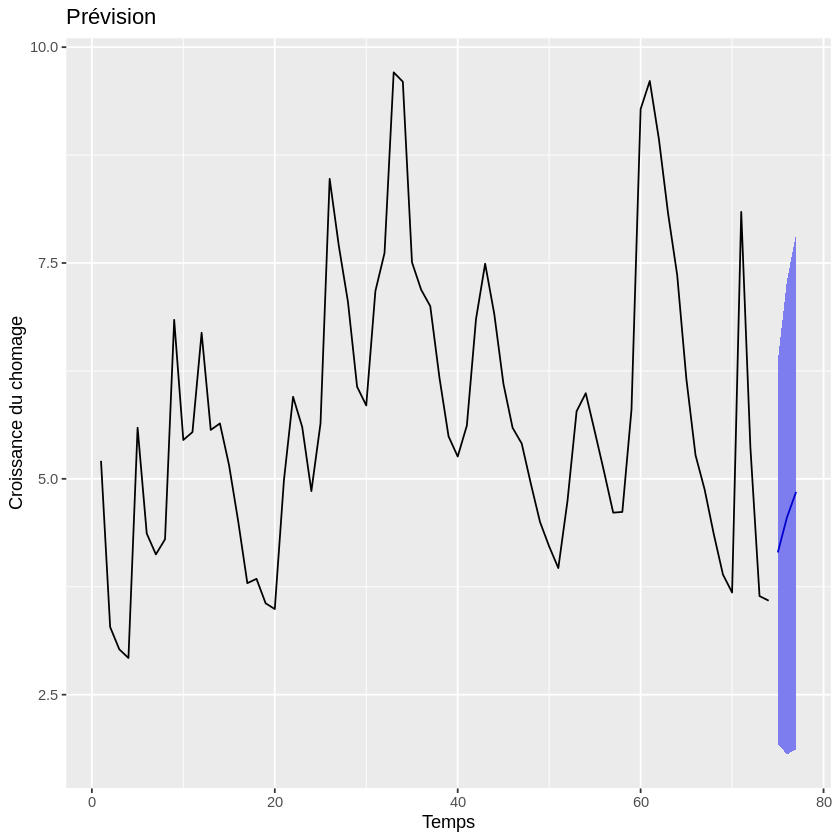

In [ ]:
forecast_AR1 <- forecast(AR1, h = 3, level = 95)
forecast_AR1

autoplot(forecast_AR1, main = 'Pr√©vision', xlab = 'Temps', ylab = 'Croissance du chomage')

$$X_t= 1,538901 + 0,727X_{t-1}  + ùúÄ_t$$


Les pr√©visions du taux de ch√¥mage vont d√©pendre uniquement de la derni√®re observation pass√©e.

####**Calcul de la pr√©vision pour 2024 (h=1)**

In [ ]:
tail(forecast_AR1$mean, n = 4)

tail(chomage[73:74,])

A Time Series:
[1] 4.1476 4.5540 4.8495

Ann√©es Ch√¥mage
1 2022   3.6417 
2 2023   3.5889

La pr√©vision du taux de ch√¥mage pour l'ann√©e 2024 est : $X_{2024}= 1,538901 + 0,727\times3.5889 = 4,148$

####**Calcul de la pr√©vision pour 2025 (h=2)**

La pr√©vision du taux de ch√¥mage pour l'ann√©e 2025 est : $X_{2025}= 1,538901 + 0,727\times4,1480 = 4,554$

####**Calcul de la pr√©vision pour 2026 (h=3)**

La pr√©vision du taux de ch√¥mage pour l'ann√©e 2026 est : $X_{2026}= 1,538901 + 0,727\times4,554 = 4,849$


###**Pr√©vision avec le mod√®le avec indicatrice**

    Point Forecast  Lo 80   Hi 80  Lo 95   Hi 95
 75         3.9708 2.8552  5.0863 2.2647  5.6768
 76         3.4060 1.9818  4.8301 1.2279  5.5840
 77         4.5143 2.9263  6.1023 2.0857  6.9430
 78         4.7052 3.0221  6.3882 2.1312  7.2792
 79         4.8566 3.1164  6.5969 2.1952  7.5181
 80         4.9769 3.2015  6.7522 2.2617  7.6920
 81         5.0722 3.2752  6.8693 2.3239  7.8206
 82         5.1480 3.3373  6.9586 2.3789  7.9170
 83         5.2080 3.3889  7.0271 2.4260  7.9901
 84         5.2557 3.4313  7.0801 2.4655  8.0459
 85         5.2936 3.4658  7.1213 2.4982  8.0889
 86         5.3236 3.4937  7.1534 2.5250  8.1221
 87         5.3474 3.5162  7.1786 2.5468  8.1480
 88         5.3663 3.5343  7.1983 2.5645  8.1682
 89         5.3813 3.5488  7.2139 2.5787  8.1840
 90         5.3932 3.5604  7.2261 2.5901  8.1964
 91         5.4027 3.5696  7.2358 2.5992  8.2062
 92         5.4102 3.5770  7.2434 2.6065  8.2139
 93         5.4161 3.5828  7.2495 2.6124  8.2199
 94         5.4209 3

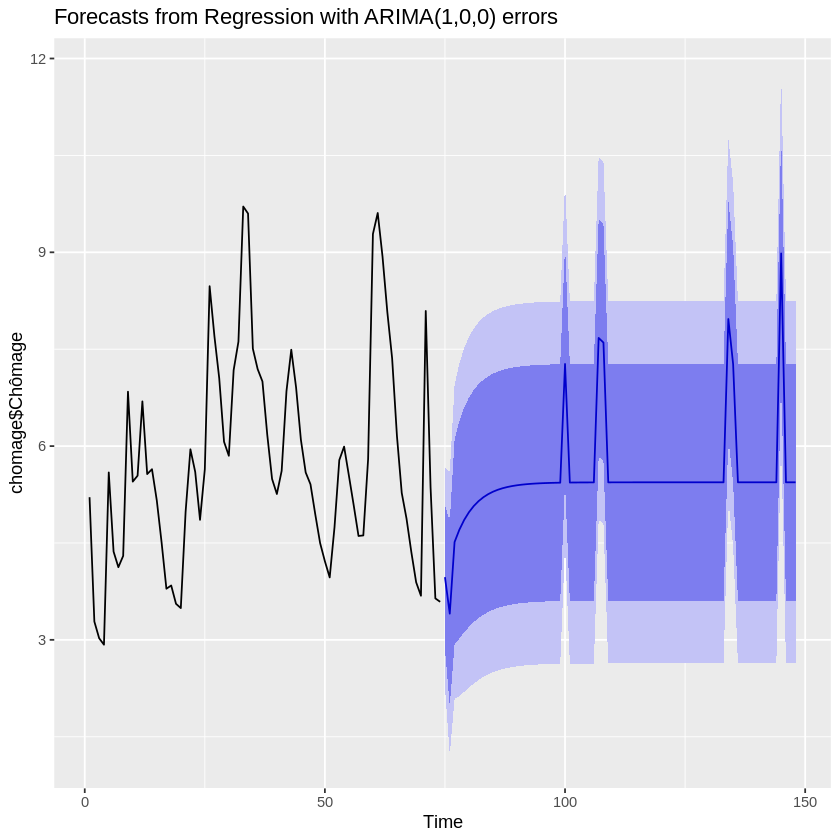

In [ ]:
library(forecast)

forecast_DUM <- forecast(AR1_DUM, h = 3, xreg = variables_indicatrices)
forecast_DUM
autoplot(forecast_DUM)

Le mod√®le avec indicatrice a les m√™mes pr√©visions sur les horizons $h$ que le mod√®le sans indicatrice, puisque ces derni√®res vont toutes √™tre √©gales √† 0 pour les dates $t$ √©gale √† 2024, 2025, 2026.  

# **Partie II - Mod√©lisation Multivari√©e**

On utilise un mod√©le VAR pour √©tudier les relations entre le taux de ch√¥mage et le taux d'inflation diff√©renci√© aux Etats-Unis.


## **Question 6 - Mod√©lisation VAR**

On utilise la librairie "vars" pour estimer le mod√®le VAR.

###**Estimation d'un mod√®le VAR**

---



In [ ]:
# Fusion des deux s√©ries de l'inflation diff√©renci√©e et le ch√¥mage.

# On enl√®ve la 1√®re obs du taux de ch√¥mage car l'inflation manque une obs √† cause de la diff√©renciation
df_Chom <- chomage[-1,]
df_infS <- data.frame(Annees = annees[-1,], Inflation_diff√©renci√© = diff_inflation)

colnames(df_infS) <- c('Ann√©es','Inflation Diff√©renci√©e')

# Affichage ch√¥mage
head(df_Chom)
tail(df_Chom)

# Affichage inflation diff√©renci√©e
head(df_infS)
tail(df_infS)

# Affichage dataframe fusionn√©
endogen <- merge(df_infS, df_Chom, by='Ann√©es')
head(endogen)
tail(endogen)

Ann√©es Ch√¥mage
1 1951   3.2833 
2 1952   3.0250 
3 1953   2.9250 
4 1954   5.5917 
5 1955   4.3667 
6 1956   4.1250

Ann√©es Ch√¥mage
1 2018   3.8917 
2 2019   3.6833 
3 2020   8.0917 
4 2021   5.3667 
5 2022   3.6417 
6 2023   3.5889

Ann√©es Inflation Diff√©renci√©e
1 1951    6.6                  
2 1952   -6.0                  
3 1953   -1.1                  
4 1954   -0.1                  
5 1955   -1.1                  
6 1956    1.9

Ann√©es Inflation Diff√©renci√©e
68 2018    0.30                 
69 2019   -0.60                 
70 2020   -0.60                 
71 2021    3.50                 
72 2022    3.30                 
73 2023   -3.57

Ann√©es Inflation Diff√©renci√©e Ch√¥mage
1 1951    6.6                   3.2833 
2 1952   -6.0                   3.0250 
3 1953   -1.1                   2.9250 
4 1954   -0.1                   5.5917 
5 1955   -1.1                   4.3667 
6 1956    1.9                   4.1250

Ann√©es Inflation Diff√©renci√©e Ch√¥mage
68 2018    0.30                  3.8917 
69 2019   -0.60                  3.6833 
70 2020   -0.60                  8.0917 
71 2021    3.50                  5.3667 
72 2022    3.30                  3.6417 
73 2023   -3.57                  3.5889

On commence par d√©terminer le nombre de retards par l'application de crit√®res d'information multivari√©s. On doit sp√©cifier :


1.  lag.max = nombre maximal de retards
2.   type = forme de la composante d√©terministe "const", "trend", "both" ou "none" (1 seule sp√©cification possible).

On choisit un nombre de retards maximum √©gal √† 4 (correspond √† 4 ann√©es de recul) et l'on estime un mod√®le VAR sans constante. D'apr√®s nos r√©sultats pr√©c√©dents, on a le taux de ch√¥mage stationnaire autour d'une constante, alors que le taux d'inflation diff√©renci√© est un processus DS sans d√©rive. Afin de d√©cider de la forme de la composante d√©terministe entre: "const" et "none", nous allons estimer un mod√®le VAR avec constante et sans constante. Ensuite d√©cider quel mod√®le √† garder en fonction de ces deux derniers.

#### **Mod√®le VAR sans constante**

In [ ]:
#install.packages('vars')
library(vars)

pselect <- VARselect(y = endogen, lag.max = 4, type = 'none')

# Affichage des valeurs des crit√®res de s√©lection
pselect$criteria

# Nombre de retards optimal selon les crit√®res de s√©lection
pselect$selection

Loading required package: MASS

Loading required package: strucchange

Loading required package: sandwich



1           2           3           4          
AIC(n) -7.87400628 -5.4471e+01 -5.4557e+01 -5.4534e+01
HQ(n)  -7.75839611 -5.4240e+01 -5.4210e+01 -5.4072e+01
SC(n)  -7.58260109 -5.3888e+01 -5.3683e+01 -5.3369e+01
FPE(n)  0.00038057  2.2090e-24  2.0330e-24  2.0931e-24

AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      2      2      3

Le nombre de retard optimal varie selon le crit√®re :

- Le crit√®re $AIC$ pr√©conise 3 retards,
- Le crit√®re $HQ$ pr√©conise 2 retards,
- Le crit√®re $SC$ pr√©conise 2 retard,
- Le nombre de retards optimaux sont n√©anmoins inf√©rieurs √† lag.max

Le crit√®re $AIC$ est connu pour surestimer le nombre de retards. On d√©cide d'estimer le mod√®le $VAR$ avec 2 retards.

In [ ]:
#install.packages('vars')
library(vars)

# Estimation du VAR
VAR2 <- VAR(y = endogen[,c('Inflation Diff√©renci√©e','Ch√¥mage')], type = "none", lag.max = 2)
summary(VAR2)


VAR Estimation Results:
Endogenous variables: Inflation.Diff√©renci√©e, Ch√¥mage 
Deterministic variables: none 
Sample size: 71 
Log Likelihood: -240.114 
Roots of the characteristic polynomial:
0.983 0.582 0.582 0.0073
Call:
VAR(y = endogen[, c("Inflation Diff√©renci√©e", "Ch√¥mage")], 
    type = "none", lag.max = 2)


Estimation results for equation Inflation.Diff√©renci√©e: 
Inflation.Diff√©renci√©e = Inflation.Diff√©renci√©e.l1 + Ch√¥mage.l1 + Inflation.Diff√©renci√©e.l2 + Ch√¥mage.l2 

                          Estimate Std. Error t value Pr(>|t|)   
Inflation.Diff√©renci√©e.l1   0.0814     0.1106    0.74   0.4639   
Ch√¥mage.l1                 -0.2309     0.1704   -1.36   0.1799   
Inflation.Diff√©renci√©e.l2  -0.3061     0.1000   -3.06   0.0032 **
Ch√¥mage.l2                  0.2322     0.1702    1.36   0.1771   
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1


Residual standard error: 1.61 on 67 degrees of freedom
Multiple R-Squared: 0

- R√©sultats de l'√©quation pour **le taux d'inflation diff√©renci√©** :
 * Le lag 2 du taux d'inflation diff√©renci√© est significatif (p-value = 0.0032) au seuil de 1%.

 * Les autres coefficients (lag 1 du taux d'inflation diff√©renci√©, lag 1 et 2 du taux de ch√¥mage) sont statistiquement significatifs au seuil de 5%.
 * Les coefficients (lag 1 du taux de ch√¥mage et lag 2 du taux d'inflation diff√©renci√©) sont n√©gatifs.
 * Le $R^2$ ajust√© est 12,7% ce qui indique une capacit√© modeste du mod√®le √† expliquer la variabilit√© du taux d'inflation diff√©renci√©.

- R√©sultats de l'√©quation pour **le taux de ch√¥mage** :
 * Le lag 1 du taux de ch√¥mage est tr√®s significatif (p-value = 7,1e-12 < 0,01).
 * Les deux lags du taux d'inflation diff√©renci√© sont significatifs au seuil de 5%. Cependant, le lag 2 du taux de ch√¥mage n'est pas significatif.
 * Le $R^2$ ajust√© est tr√®s √©lev√© (0.963), sugg√©rant que le mod√®le explique presque toute la variabilit√© du taux de ch√¥mage.



#### **Mod√®le VAR avec constante**

In [ ]:
#install.packages('vars')
library(vars)

pselect <- VARselect(y = endogen, lag.max = 4, type = 'const')

# Affichage des valeurs des crit√®res de s√©lection
pselect$criteria

# Nombre de retards optimal selon les crit√®res de s√©lection
pselect$selection

1           2           3           4          
AIC(n) -5.4578e+01 -5.4384e+01 -5.4470e+01 -5.4447e+01
HQ(n)  -5.4424e+01 -5.4114e+01 -5.4085e+01 -5.3946e+01
SC(n)  -5.4190e+01 -5.3704e+01 -5.3499e+01 -5.3184e+01
FPE(n)  1.9819e-24  2.4116e-24  2.2214e-24  2.2900e-24

AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

Tous les crit√©res renvoient 1 retard. Nous estimons donc le mod√©le VAR(1)

In [ ]:
#install.packages('vars')
library(vars)

# Estimation du VAR
VAR1 <- VAR(y = endogen[,c('Inflation Diff√©renci√©e','Ch√¥mage')], type = "const", lag.max = 1)
summary(VAR1)


VAR Estimation Results:
Endogenous variables: Inflation.Diff√©renci√©e, Ch√¥mage 
Deterministic variables: const 
Sample size: 72 
Log Likelihood: -251.927 
Roots of the characteristic polynomial:
0.735 0.0483
Call:
VAR(y = endogen[, c("Inflation Diff√©renci√©e", "Ch√¥mage")], 
    type = "const", lag.max = 1)


Estimation results for equation Inflation.Diff√©renci√©e: 
Inflation.Diff√©renci√©e = Inflation.Diff√©renci√©e.l1 + Ch√¥mage.l1 + const 

                          Estimate Std. Error t value Pr(>|t|)
Inflation.Diff√©renci√©e.l1  -0.0493     0.1201   -0.41     0.68
Ch√¥mage.l1                 -0.0493     0.1447   -0.34     0.73
const                       0.2408     0.8667    0.28     0.78


Residual standard error: 1.89 on 69 degrees of freedom
Multiple R-Squared: 0.00312,	Adjusted R-squared: -0.0258 
F-statistic: 0.108 on 2 and 69 DF,  p-value: 0.898 


Estimation results for equation Ch√¥mage: 
Ch√¥mage = Inflation.Diff√©renci√©e.l1 + Ch√¥mage.l1 + const 

                 

- R√©sultats de l'√©quation pour **le taux d'inflation diff√©renci√©** :
 * Les lags 1 du taux d'inflation diff√©renci√© et du taux de ch√¥mage ne sont pas statistiquement significatifs, avec des valeurs p-value √©lev√©es (0.68 et 0.73 respectivement).
 * Le terme constant n'est pas significatif non plus (p-value = 0.78).
 * Le $R^2$ ajust√© est n√©gatif -2,58%, ce qui indique que le mod√®le est inad√©quat et qu'il ne parvient pas √† expliquer la variance du taux d'inflation diff√©renci√©.

- R√©sultats de l'√©quation pour **le taux de ch√¥mage** :
 * Le lag 1 du taux de ch√¥mage est tr√®s significatif (p-value < 0.001), indiquant un fort effet du ch√¥mage pass√© sur le ch√¥mage actuel.
 * Le lag 1 du taux d'inflation diff√©renci√© n'est pas significatif.
 * Le terme constant est significatif (p-value = 0.0045).
 * Le $R^2$ ajust√© est assez √©lev√© (52,4%), indiquant que le mod√®le explique une bonne part de la variabilit√© du taux de ch√¥mage.

- Conclusion:

On d√©cide de garder le mod√®le VAR sans constante, c'est √† dire VAR(2). En effet, dans ce mod√®le, les coefficients des variables explicatives (inflation diff√©renci√© lag 1 et 2, et chomage lag 1 et 2) de l'√©quation de l'inflation diff√©renci√© sont tous significatifs. De plus, le $R^2$ ajust√© de l'estimation  du taux de ch√¥mage dans ce mod√®le est relativement √©lev√© (96,3%).

In [ ]:
# Matrice des coefficients du mod√®le VAR(2)

A <- Acoef(VAR2)
A

[[1]]
                       Inflation.Diff√©renci√©e.l1 Ch√¥mage.l1
Inflation.Diff√©renci√©e                   0.08145   -0.23094
Ch√¥mage                                  0.11951    1.04884

[[2]]
                       Inflation.Diff√©renci√©e.l2 Ch√¥mage.l2
Inflation.Diff√©renci√©e                 -0.306114   0.232244
Ch√¥mage                                 0.076244  -0.065785

####**Affichage des racines du polyn√¥me caract√©ristique**

On √©tudie la stationnarit√© du $VAR(2)$. La fonction roots renvoie les modules des inverses des racines du polyn√¥me caract√©ristique.



In [ ]:
# Roots du mod√®le VAR(2)
roots(VAR2)

[1] 0.982778 0.582177 0.582177 0.007297

Les inverses des racines de module sont strictement inf√©rieurs √† 1 : la condition de stationnarit√© est donc satisfaite.



## **Question 7 - Les Tests de Causalit√© au Sens de Granger**

####**Causalit√© de l'inflation diff√©renci√©e sur le ch√¥mage**


L'√©quation du chomage s'√©crit :

$$C_t=a_{21}^1\times{ID}_{t-1}+a_{22}^1\times{C}_{t-1}+a_{21}^2\times{ID}_{t-2}+a_{22}^2\times{C}_{t-2}$$

Les r√©sultats du test figurent ci-dessous :

On v√©rifie la significativit√© du coefficient de **Inflation.Diff√©renci√©e** dans l'√©quation de **Ch√¥mage**.

* Les hypoth√®ses du test sont :

$$\begin{equation}
\begin{cases}
H_0:a_{21}^1=a_{21}^2=0\ (Inflation.Diff√©renci√©e\ ne\ cause\ pas\  Ch√¥mage)\\
H_1: \overline{H_0}\ (Inflation.Diff√©renci√©e\ cause\ Ch√¥mage)
\end{cases}
\end{equation}$$

o√π $a_{21}$ est le coefficient de la ligne 2 et colonne 1 des matrices $A$.

* La statistique du test :

$$F=\frac{(SCR_0-SCR_1)/p}{SCR_1/(T'-2p-1)}\underset{H_0}{\sim}F_{p,\ T'-2p-1}$$

* La r√®gle de d√©cision : rejet de $H_0$ au seuil $ùõº$ si $F>F_{p,\ T'-2p-1}^{1-ùõº}$ ou $p-value<ùõº$

In [ ]:
# Test de causalit√© de l'inflation diff√©renci√©e sur le ch√¥mage

TC1 <- causality(VAR2, cause = c('Inflation.Diff√©renci√©e'))
TC1$Granger


	Granger causality H0: Inflation.Diff√©renci√©e do not Granger-cause
	Ch√¥mage

data:  VAR object VAR2
F-Test = 1.67, df1 = 2, df2 = 134, p-value = 0.19


La p-value du test vaut 19% > 5%, donc on ne rejette pas l'hypoth√®se nulle d'absence de causalit√© de l'inflation diff√©renci√©e sur la ch√¥mage. C'est √† dire que l'inflation diff√©renci√©e ne cause pas le ch√¥mage pour un risque de premi√®re esp√©ce de 5%.

####**Causalit√© du ch√¥mage sur l'inflation diff√©renci√©e**

L'√©quation de l'inflation diff√©renci√©e s'√©crit :

$$ID_t=a_{11}^1\times{ID}_{t-1}+a_{12}^1\times{C}_{t-1}+a_{11}^2\times{ID}_{t-2}+a_{12}^2\times{C}_{t-2}$$

Les r√©sultats du test figurent ci-dessous :


On v√©rifie la significativit√© du coefficient de **Ch√¥mage** dans l'√©quation de **Inflation.Diff√©renci√©e**.

* Les hypoth√®ses du test sont :

$$\begin{equation}
\begin{cases}
H_0:a_{12}^1= a_{12}^2=0\ (Ch√¥mage\ ne\ cause\ pas\ Inflation.Diff√©renci√©e)\\
H_1:\overline{H_0}\ (Ch√¥mage\ cause\ Inflation.Diff√©renci√©e)
\end{cases}
\end{equation}$$

o√π $a_{12}^{1}$ est le coefficient de la ligne 1 et colonne 2 de la matrice $A$.

* La statistique du test :

$$F=\frac{(SCR_0-SCR_1)/p}{SCR_1/(T'-2p-1)}\underset{H_0}{\sim}F_{p,\ T'-2p-1}$$

* La r√®gle de d√©cision : rejet de $H_0$ au seuil $ùõº$ si $F>F_{p,\ T'-2p-1}^{1-ùõº}$ ou $p-value<ùõº$

In [ ]:
# Test de causalit√© du ch√¥mage sur l'inflation diff√©renci√©e
TC2 <- causality(VAR2, cause = c("Ch√¥mage"))
TC2$Granger


	Granger causality H0: Ch√¥mage do not Granger-cause
	Inflation.Diff√©renci√©e

data:  VAR object VAR2
F-Test = 0.934, df1 = 2, df2 = 134, p-value = 0.4


La p-value du test vaut 40% > 5%, donc on ne rejette pas l'hypoth√©se nulle d'absence de causalit√© du chomage sur l'inflation. C'est √† dire que le chomage ne cause pas l'inflation diff√©renci√©e pour un risque de premi√®re esp√©ce de 5%.

## **Question 8 - Analyse Impulsion-R√©ponse des Chocs**

#### **D√©composition de la variance**

On d√©cide de r√©aliser la d√©composition de la variance afin de savoir quelle variable prendre en premier dans la d√©composition de Choleski.

$Inflation.Diff√©renci√©e
      Inflation.Diff√©renci√©e  Ch√¥mage
 [1,]                1.00000 0.000000
 [2,]                0.97489 0.025115
 [3,]                0.97678 0.023219
 [4,]                0.97433 0.025667
 [5,]                0.97425 0.025746
 [6,]                0.97416 0.025840
 [7,]                0.97416 0.025841
 [8,]                0.97412 0.025875
 [9,]                0.97410 0.025903
[10,]                0.97410 0.025905
[11,]                0.97409 0.025907
[12,]                0.97409 0.025913
[13,]                0.97408 0.025921
[14,]                0.97407 0.025926
[15,]                0.97407 0.025931
[16,]                0.97406 0.025936
[17,]                0.97406 0.025941
[18,]                0.97405 0.025945
[19,]                0.97405 0.025950
[20,]                0.97405 0.025954

$Ch√¥mage
      Inflation.Diff√©renci√©e Ch√¥mage
 [1,]               0.106702 0.89330
 [2,]               0.069297 0.93070
 [3,]               0.048454 0.95155
 [4,]      

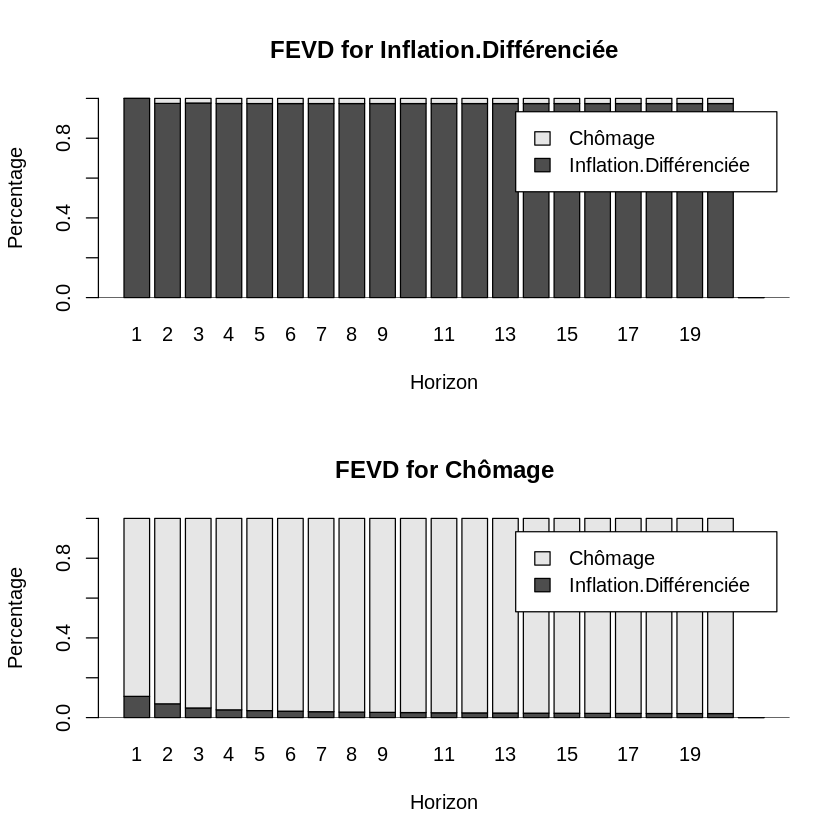

In [ ]:
dec_var <- fevd(VAR2, n.ahead = 20)
print(dec_var)
plot(dec_var)

Les graphiques semblent illustrer que la majorit√© de la variance de l'inflation diff√©renci√©e est expliqu√©e par ses propres chocs plut√¥t que par ceux du ch√¥mage √† travers diff√©rents horizons temporels. De m√™me, pour la s√©rie du ch√¥mage, la variance est principalement expliqu√©e par ses propres chocs et non aux chocs de l'inflation diff√©renci√©e.


####**M√©thode VAR**

On calcule les fonctions impulsion r√©ponse :

* n.ahead : nombre de p√©riodes futures pour lesquelles on calcule les impulsion r√©ponse

* ortho = TRUE : on applique la d√©composition de Cholesky

* ci = 0.95 : on repr√©sente les bornes de l'intervalle de confiance √† 95 % pour d√©terminer la significativit√© des IRF.

On d√©cide de prendre l'inflation diff√©renci√©e en premier dans la d√©composition de Choleski, car c'est l'inflation diff√©renci√©e qui est la moins caus√©e puisque le F - test correspondant est √©gale √† 93,4%.

##### **Inflation diff√©renci√©e**


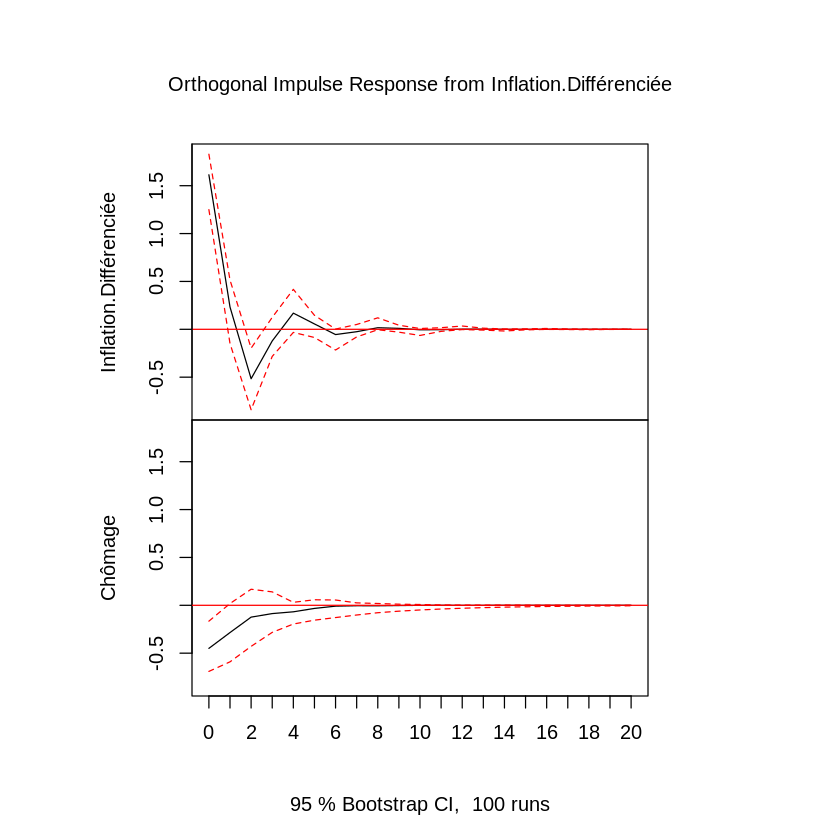

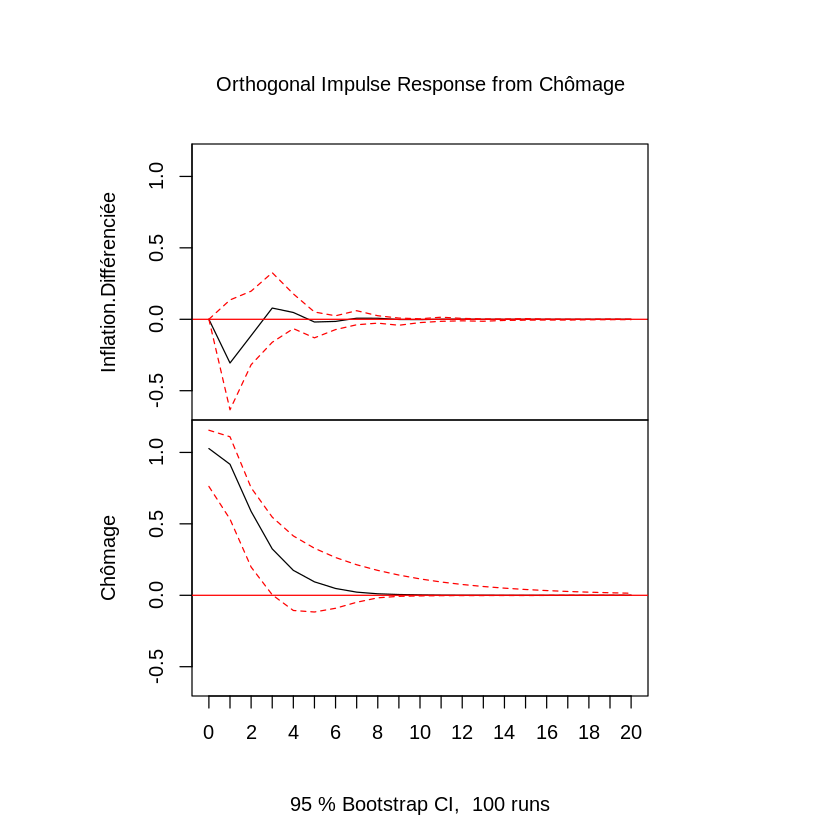

In [ ]:
# Inflation diff√©renci√©e en 1er
var.2lag <- VAR(y = endogen[,c("Inflation Diff√©renci√©e","Ch√¥mage")], type = "const", lag.max = 2)

irf <- irf(var.2lag, n.ahead = 20, ortho = TRUE, ci = 0.95)
plot(irf)

* La premi√®re figure **"Orthogonal IR from Inflation_Diff√©renci√©e"** retrace les r√©ponses de l'inflation dif√©renci√©e (premier graphe) et du ch√¥mage (second graphe) √† un **choc sur l'inflation diff√©renci√©e**.

Les r√©ponses √† un choc dans l'inflation diff√©renci√©e sont affich√©es. On peut observer que le choc sur l'inflation diff√©renci√©e a un impact initial sur elle-m√™me qui s'estompe rapidement, sugg√©rant que l'inflation revient rapidement √† son niveau d'√©quilibre apr√®s un choc. La r√©ponse du ch√¥mage √† un choc d'inflation semble √™tre minimale et rentre √©galement dans la bande de confiance apr√®s quelques p√©riodes, ce qui indique que le choc de l'inflation n'a pas un effet durable ou significatif sur le ch√¥mage.

* La seconde figure **"Orthogonal IR from Ch√¥mage"** retrace les r√©ponses de l'inflation dif√©renci√©e (premier graphe) et du ch√¥mage (second graphe) √† un **choc sur le ch√¥mage**.

Ici, un choc dans le ch√¥mage semble avoir un effet n√©gatif initial sur l'inflation diff√©renci√©e qui devient insignifiant rapidement. La r√©ponse du ch√¥mage √† son propre choc montre une d√©croissance plus lente, indiquant que les effets d'un choc dans le ch√¥mage sur lui-m√™me peuvent √™tre plus persistants.

####**M√©thode des projections locales de Jorda**

[[1]]
NULL


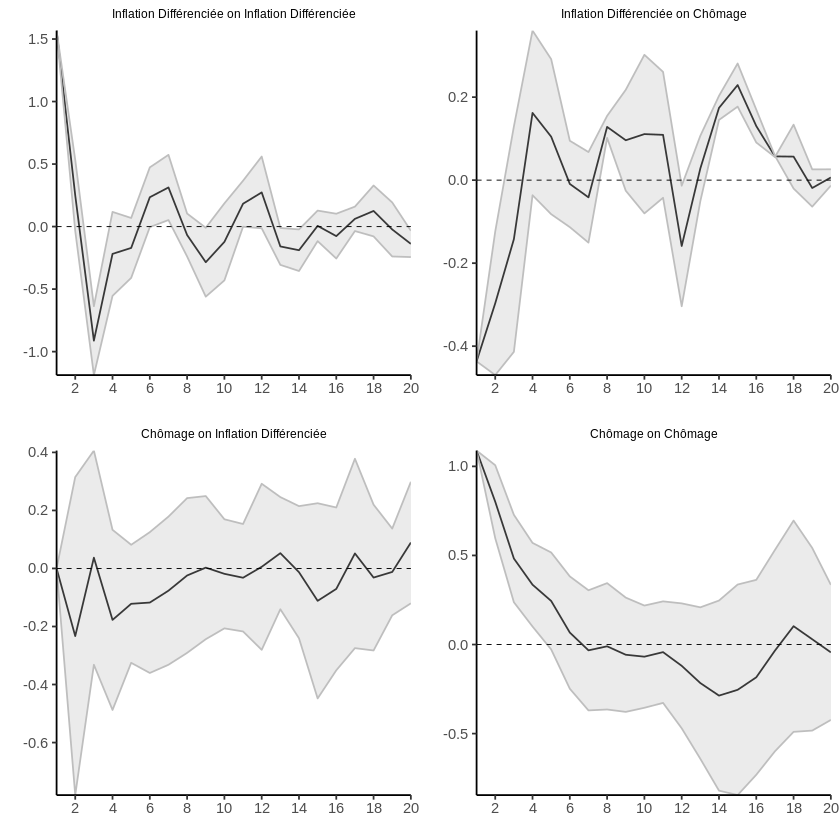

In [ ]:
#install.packages('lpirfs')
library(lpirfs)

irf_LP <- lp_lin(endog_data = endogen[,c('Inflation Diff√©renci√©e','Ch√¥mage')],
                    lags_endog_lin = NaN,
                    lags_criterion = 'BIC',
                    max_lags = 4,
                    trend = 0,
                    shock_type = 0,
                    confint = 1.96,
                    hor = 20,
                    adjust_se = TRUE)

plot(irf_LP)

- Inflation diff√©renci√©e sur elle-m√™me : Les chocs dans l'inflation diff√©renci√©e ont un effet initial important sur elle-m√™me qui d√©cro√Æt rapidement, indiquant que l'inflation revient vers son niveau d'√©quilibre apr√®s un choc.

- Inflation diff√©renci√©e sur le ch√¥mage : Il semble que les chocs dans l'inflation diff√©renci√©e aient un effet tr√®s limit√© et non significatif sur le ch√¥mage, car l'intervalle de confiance inclut z√©ro sur presque tous les horizons.

- Ch√¥mage sur l'inflation diff√©renci√©e : De m√™me, les chocs dans le ch√¥mage ne semblent pas avoir d'impact significatif sur l'inflation diff√©renci√©e, indiqu√© par l'intervalle de confiance qui inclut z√©ro.

- Ch√¥mage sur lui-m√™me : Les chocs dans le ch√¥mage ont un impact initial assez fort sur lui-m√™me, mais cette influence diminue avec le temps.

On conclut que les chocs internes √† chaque s√©rie ont un effet plus prononc√© et imm√©diat sur la s√©rie elle-m√™me, tandis que l'impact d'une s√©rie sur l'autre est moins clair et g√©n√©ralement non significatif dans l'intervalle de confiance de 95%.


## **Question 9 - Test de Conint√©gration de Johansen**

Puisque, le taux de chomage est un processus stationnaire et le taux d'inflation est un processus DS(1) sans d√©rive comme vu √† la question 3. Nous n'avons pas besoin de r√©aliser une coint√©gration de johansen.

#**Conclusion**

En conclusion les r√©sultats obtenus offrent un nouvel √©clairage sur la relation de Phillips, postulant une relation inverse entre l'inflation et le ch√¥mage. Notre analyse des s√©ries temporelles sur une longue p√©riode a mis en √©vidence que les interactions entre le ch√¥mage et l'inflation aux √âtats-Unis de 1950 √† 2023 sont plus complexes et moins pr√©dictibles que la relation traditionnelle de Phillips pourrait le sugg√©rer.

Les fonctions de r√©ponse impulsionnelle ont indiqu√© que les chocs au sein de chaque s√©rie avaient des effets principalement internes et ne traduisaient pas de relation significative crois√©e, ce qui remet en question la robustesse de la courbe de Phillips dans le contexte actuel. De plus, la d√©composition de la variance d'erreur de pr√©vision a montr√© que chaque variable est largement influenc√©e par ses propres innovations plut√¥t que par celles de l'autre s√©rie. En effet, ce projet a soulign√© l'autonomie relative du ch√¥mage et de l'inflation en tant que processus √©conomiques, sugg√©rant que des facteurs autres que ceux traditionnellement envisag√©s pourraient jouer un r√¥le dans leur comportement √† travers le temps.

Cela sugg√®re que la politique √©conomique devrait √™tre attentive √† une gamme plus diversifi√©e de facteurs √©conomiques et ne pas se reposer uniquement sur le rapport traditionnel entre inflation et ch√¥mage. Consid√©rer une gamme plus large des facteurs lorsque l'on tente de stimuler l'emploi ou de contr√¥ler l'inflation.





